In [35]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hdbscan
import umap
import hdbscan
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# Carregamento dos dados

In [5]:
#Cria engine e realiza consulta ao banco de dados
engine = create_engine('mssql+pyodbc://MACHIAVELI-PC\\SQLEXPRESS/TCC_PUC?driver=SQL+Server', use_setinputsizes=False)

rend_escolar_consolidado = pd.read_sql(
      "SELECT\
		   rs.NO_REGIAO\
		  ,rs.CO_UF\
		  ,rs.TP_LOCAL\
		  ,rs.DEPENDENCIA_ADM\
          ,rs.TOTAL_APROVACAO\
          ,rs.TOTAL_REPROVACAO\
          ,rs.TOTAL_ABANDONO\
		  ,rcd.MEDIA_IRD\
		  ,ma.MEDIA_ALUNOS\
		  ,meb.IN_VINCULO_SECRETARIA_EDUCACAO\
		  ,meb.IN_VINCULO_SEGURANCA_PUBLICA\
		  ,meb.IN_VINCULO_SECRETARIA_SAUDE\
		  ,meb.IN_VINCULO_OUTRO_ORGAO\
		  ,meb.IN_PODER_PUBLICO_PARCERIA\
		  ,meb.IN_FORMA_CONT_TERMO_COLABORA\
		  ,meb.IN_FORMA_CONT_TERMO_FOMENTO\
		  ,meb.IN_FORMA_CONT_ACORDO_COOP\
		  ,meb.IN_FORMA_CONT_PRESTACAO_SERV\
		  ,meb.IN_FORMA_CONT_COOP_TEC_FIN\
		  ,meb.IN_FORMA_CONT_CONSORCIO_PUB\
		  ,meb.IN_FORMA_CONT_MU_TERMO_COLAB\
		  ,meb.IN_FORMA_CONT_MU_TERMO_FOMENTO\
		  ,meb.IN_FORMA_CONT_MU_ACORDO_COOP\
		  ,meb.IN_FORMA_CONT_MU_PREST_SERV\
		  ,meb.IN_FORMA_CONT_MU_COOP_TEC_FIN\
		  ,meb.IN_FORMA_CONT_MU_CONSORCIO_PUB\
		  ,meb.IN_FORMA_CONT_ES_TERMO_COLAB\
		  ,meb.IN_FORMA_CONT_ES_TERMO_FOMENTO\
		  ,meb.IN_FORMA_CONT_ES_ACORDO_COOP\
		  ,meb.IN_FORMA_CONT_ES_PREST_SERV\
		  ,meb.IN_FORMA_CONT_ES_COOP_TEC_FIN\
		  ,meb.IN_FORMA_CONT_ES_CONSORCIO_PUB\
		  ,meb.IN_LOCAL_FUNC_PREDIO_ESCOLAR\
		  ,meb.IN_LOCAL_FUNC_SOCIOEDUCATIVO\
		  ,meb.IN_LOCAL_FUNC_UNID_PRISIONAL\
		  ,meb.IN_LOCAL_FUNC_PRISIONAL_SOCIO\
		  ,meb.IN_LOCAL_FUNC_GALPAO\
		  ,meb.IN_LOCAL_FUNC_SALAS_OUTRA_ESC\
		  ,meb.IN_LOCAL_FUNC_OUTROS\
		  ,meb.IN_PREDIO_COMPARTILHADO\
		  ,meb.IN_AGUA_POTAVEL\
		  ,meb.IN_AGUA_REDE_PUBLICA\
		  ,meb.IN_AGUA_POCO_ARTESIANO\
		  ,meb.IN_AGUA_CACIMBA\
		  ,meb.IN_AGUA_FONTE_RIO\
		  ,meb.IN_AGUA_INEXISTENTE\
		  ,meb.IN_ENERGIA_REDE_PUBLICA\
		  ,meb.IN_ENERGIA_GERADOR_FOSSIL\
		  ,meb.IN_ENERGIA_RENOVAVEL\
		  ,meb.IN_ENERGIA_INEXISTENTE\
		  ,meb.IN_ESGOTO_REDE_PUBLICA\
		  ,meb.IN_ESGOTO_FOSSA_SEPTICA\
		  ,meb.IN_ESGOTO_FOSSA_COMUM\
		  ,meb.IN_ESGOTO_FOSSA\
		  ,meb.IN_ESGOTO_INEXISTENTE\
		  ,meb.IN_LIXO_SERVICO_COLETA\
		  ,meb.IN_LIXO_QUEIMA\
		  ,meb.IN_LIXO_ENTERRA\
		  ,meb.IN_LIXO_DESTINO_FINAL_PUBLICO\
		  ,meb.IN_LIXO_DESCARTA_OUTRA_AREA\
		  ,meb.IN_TRATAMENTO_LIXO_SEPARACAO\
		  ,meb.IN_TRATAMENTO_LIXO_REUTILIZA\
		  ,meb.IN_TRATAMENTO_LIXO_RECICLAGEM\
		  ,meb.IN_TRATAMENTO_LIXO_INEXISTENTE\
		  ,meb.IN_ALMOXARIFADO\
		  ,meb.IN_AREA_VERDE\
		  ,meb.IN_AUDITORIO\
		  ,meb.IN_BANHEIRO\
		  ,meb.IN_BANHEIRO_EI\
		  ,meb.IN_BANHEIRO_PNE\
		  ,meb.IN_BANHEIRO_FUNCIONARIOS\
		  ,meb.IN_BANHEIRO_CHUVEIRO\
		  ,meb.IN_BIBLIOTECA\
		  ,meb.IN_BIBLIOTECA_SALA_LEITURA\
		  ,meb.IN_COZINHA\
		  ,meb.IN_DESPENSA\
		  ,meb.IN_DORMITORIO_ALUNO\
		  ,meb.IN_DORMITORIO_PROFESSOR\
		  ,meb.IN_LABORATORIO_CIENCIAS\
		  ,meb.IN_LABORATORIO_INFORMATICA\
		  ,meb.IN_LABORATORIO_EDUC_PROF\
		  ,meb.IN_PATIO_COBERTO\
		  ,meb.IN_PATIO_DESCOBERTO\
		  ,meb.IN_PARQUE_INFANTIL\
		  ,meb.IN_PISCINA\
		  ,meb.IN_QUADRA_ESPORTES\
		  ,meb.IN_QUADRA_ESPORTES_COBERTA\
		  ,meb.IN_QUADRA_ESPORTES_DESCOBERTA\
		  ,meb.IN_REFEITORIO\
		  ,meb.IN_SALA_ATELIE_ARTES\
		  ,meb.IN_SALA_MUSICA_CORAL\
		  ,meb.IN_SALA_ESTUDIO_DANCA\
		  ,meb.IN_SALA_MULTIUSO\
		  ,meb.IN_SALA_ESTUDIO_GRAVACAO\
		  ,meb.IN_SALA_OFICINAS_EDUC_PROF\
		  ,meb.IN_SALA_DIRETORIA\
		  ,meb.IN_SALA_LEITURA\
		  ,meb.IN_SALA_PROFESSOR\
		  ,meb.IN_SALA_REPOUSO_ALUNO\
		  ,meb.IN_SECRETARIA\
		  ,meb.IN_SALA_ATENDIMENTO_ESPECIAL\
		  ,meb.IN_TERREIRAO\
		  ,meb.IN_VIVEIRO\
		  ,meb.IN_DEPENDENCIAS_OUTRAS\
		  ,meb.IN_ACESSIBILIDADE_CORRIMAO\
		  ,meb.IN_ACESSIBILIDADE_ELEVADOR\
		  ,meb.IN_ACESSIBILIDADE_PISOS_TATEIS\
		  ,meb.IN_ACESSIBILIDADE_VAO_LIVRE\
		  ,meb.IN_ACESSIBILIDADE_RAMPAS\
		  ,meb.IN_ACESSIBILIDADE_SINAL_SONORO\
		  ,meb.IN_ACESSIBILIDADE_SINAL_TATIL\
		  ,meb.IN_ACESSIBILIDADE_SINAL_VISUAL\
		  ,meb.IN_ACESSIBILIDADE_INEXISTENTE\
		  ,meb.IN_EQUIP_PARABOLICA\
		  ,meb.IN_COMPUTADOR\
		  ,meb.IN_EQUIP_COPIADORA\
		  ,meb.IN_EQUIP_IMPRESSORA\
		  ,meb.IN_EQUIP_IMPRESSORA_MULT\
		  ,meb.IN_EQUIP_SCANNER\
		  ,meb.IN_EQUIP_NENHUM\
		  ,meb.IN_EQUIP_DVD\
		  ,meb.IN_EQUIP_SOM\
		  ,meb.IN_EQUIP_TV\
		  ,meb.IN_EQUIP_LOUSA_DIGITAL\
		  ,meb.IN_EQUIP_MULTIMIDIA\
		  ,meb.IN_DESKTOP_ALUNO\
		  ,meb.IN_COMP_PORTATIL_ALUNO\
		  ,meb.IN_TABLET_ALUNO\
		  ,meb.IN_INTERNET\
		  ,meb.IN_INTERNET_ALUNOS\
		  ,meb.IN_INTERNET_ADMINISTRATIVO\
		  ,meb.IN_INTERNET_APRENDIZAGEM\
		  ,meb.IN_INTERNET_COMUNIDADE\
		  ,meb.IN_ACESSO_INTERNET_COMPUTADOR\
		  ,meb.IN_ACES_INTERNET_DISP_PESSOAIS\
		  ,meb.IN_BANDA_LARGA\
		  ,meb.IN_PROF_ADMINISTRATIVOS\
		  ,meb.IN_PROF_SERVICOS_GERAIS\
		  ,meb.IN_PROF_BIBLIOTECARIO\
		  ,meb.IN_PROF_SAUDE\
		  ,meb.IN_PROF_COORDENADOR\
		  ,meb.IN_PROF_FONAUDIOLOGO\
		  ,meb.IN_PROF_NUTRICIONISTA\
		  ,meb.IN_PROF_PSICOLOGO\
		  ,meb.IN_PROF_ALIMENTACAO\
		  ,meb.IN_PROF_PEDAGOGIA\
		  ,meb.IN_PROF_SECRETARIO\
		  ,meb.IN_PROF_SEGURANCA\
		  ,meb.IN_PROF_MONITORES\
		  ,meb.IN_PROF_GESTAO\
		  ,meb.IN_PROF_ASSIST_SOCIAL\
		  ,meb.IN_PROF_TRAD_LIBRAS\
		  ,meb.IN_ALIMENTACAO\
		  ,meb.IN_MATERIAL_PED_MULTIMIDIA\
		  ,meb.IN_MATERIAL_PED_INFANTIL\
		  ,meb.IN_MATERIAL_PED_CIENTIFICO\
		  ,meb.IN_MATERIAL_PED_DIFUSAO\
		  ,meb.IN_MATERIAL_PED_MUSICAL\
		  ,meb.IN_MATERIAL_PED_JOGOS\
		  ,meb.IN_MATERIAL_PED_ARTISTICAS\
		  ,meb.IN_MATERIAL_PED_PROFISSIONAL\
		  ,meb.IN_MATERIAL_PED_DESPORTIVA\
		  ,meb.IN_MATERIAL_PED_INDIGENA\
		  ,meb.IN_MATERIAL_PED_ETNICO\
		  ,meb.IN_MATERIAL_PED_CAMPO\
		  ,meb.IN_MATERIAL_PED_BIL_SURDOS\
		  ,meb.IN_MATERIAL_PED_NENHUM\
		  ,meb.IN_EDUCACAO_INDIGENA\
		  ,meb.IN_EXAME_SELECAO\
		  ,meb.IN_RESERVA_PPI\
		  ,meb.IN_RESERVA_RENDA\
		  ,meb.IN_RESERVA_PUBLICA\
		  ,meb.IN_RESERVA_PCD\
		  ,meb.IN_RESERVA_OUTROS\
		  ,meb.IN_RESERVA_NENHUMA\
		  ,meb.IN_REDES_SOCIAIS\
		  ,meb.IN_ESPACO_ATIVIDADE\
		  ,meb.IN_ESPACO_EQUIPAMENTO\
		  ,meb.IN_ORGAO_ASS_PAIS\
		  ,meb.IN_ORGAO_ASS_PAIS_MESTRES\
		  ,meb.IN_ORGAO_CONSELHO_ESCOLAR\
		  ,meb.IN_ORGAO_GREMIO_ESTUDANTIL\
		  ,meb.IN_ORGAO_OUTROS\
		  ,meb.IN_ORGAO_NENHUM\
		  ,meb.IN_MEDIACAO_PRESENCIAL\
		  ,meb.IN_MEDIACAO_SEMIPRESENCIAL\
		  ,meb.IN_MEDIACAO_EAD\
		  ,meb.IN_REGULAR\
		  ,meb.IN_DIURNO\
		  ,meb.IN_NOTURNO\
		  ,meb.IN_EAD\
		  ,meb.IN_PROF\
		  ,meb.IN_PROF_TEC\
		  ,meb.IN_EJA\
		  ,meb.IN_ESP\
		  ,meb.IN_ESP_CC\
		  ,meb.IN_ESP_CE\
	FROM rendimento_escolar rs\
	INNER JOIN regularidade_corpo_docente rcd ON rcd.CO_ENTIDADE = rs.CO_ENTIDADE\
	INNER JOIN media_alunos ma ON ma.CO_ENTIDADE = rs.CO_ENTIDADE\
	INNER JOIN microdados_educacao_basica meb ON meb.CO_ENTIDADE = rs.CO_ENTIDADE\
    WHERE rs.DEPENDENCIA_ADM NOT LIKE 'Privada' AND rs.TOTAL_ABANDONO IS NOT NULL AND meb.TP_SITUACAO_FUNCIONAMENTO = 1",
  engine)

# Manipulação e tratamento dos dados

In [7]:
#Substitui valor 9 por 0 em variáveis 'binárias', o valor 9 é não informado, por isso será considerado 0 = não possui

# Lista de colunas onde a substituição deve ser realizada
colunas =  ['IN_TRATAMENTO_LIXO_SEPARACAO',
            'IN_TRATAMENTO_LIXO_REUTILIZA',
            'IN_TRATAMENTO_LIXO_RECICLAGEM',
            'IN_TRATAMENTO_LIXO_INEXISTENTE',
            'IN_ACESSO_INTERNET_COMPUTADOR',
            'IN_ACES_INTERNET_DISP_PESSOAIS',
            'IN_EXAME_SELECAO',
            'IN_REDES_SOCIAIS',
            'IN_ESPACO_ATIVIDADE',
            'IN_ESPACO_EQUIPAMENTO']  

# Substitui o valor 9 por 0 nas colunas especificadas
rend_escolar_consolidado[colunas] = rend_escolar_consolidado[colunas].replace(9, 0)

In [9]:
# Dicionário para armazenar as informações das colunas
column_analysis = {}

# Itera sobre cada coluna para verificar o tipo e calcular as estatísticas ou valores únicos
for column in rend_escolar_consolidado.columns:
    #Se coluna numérica não binária
    if pd.api.types.is_numeric_dtype(rend_escolar_consolidado[column]) and column.startswith('IN') == False:
        column_analysis[column] = {
            'Min': rend_escolar_consolidado[column].min(),
            'Max': rend_escolar_consolidado[column].max(),
            'Média': rend_escolar_consolidado[column].mean()
        }
    #Se coluna numérica e binária
    elif pd.api.types.is_numeric_dtype(rend_escolar_consolidado[column]) and column.startswith('IN') == True:
        column_analysis[column] = {
            'Min': rend_escolar_consolidado[column].min(),
            'Max': rend_escolar_consolidado[column].max(),
            'Porcentagem': (rend_escolar_consolidado[column].sum() * 100) / rend_escolar_consolidado.shape[0]
        }
    elif pd.api.types.is_object_dtype(rend_escolar_consolidado[column]):
        column_analysis[column] = {
            'Valores únicos': rend_escolar_consolidado[column].unique().tolist()
        }

# Exibir o resultado da análise
for column, stats in column_analysis.items():
    print(f"Coluna: {column}")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print("\n")

Coluna: NO_REGIAO
  Valores únicos: ['Sudeste', 'Centro-Oeste', 'Sul', 'Nordeste', 'Norte']


Coluna: CO_UF
  Valores únicos: ['MG', 'SP', 'GO', 'RS', 'SE', 'AP', 'TO', 'MS', 'BA', 'PR', 'MA', 'MT', 'SC', 'ES', 'PI', 'RJ', 'CE', 'RN', 'PB', 'RO', 'PE', 'AC', 'AM', 'RR', 'PA', 'AL', 'DF']


Coluna: TP_LOCAL
  Valores únicos: ['Urbana', 'Rural']


Coluna: DEPENDENCIA_ADM
  Valores únicos: ['Estadual', 'Municipal', 'Federal']


Coluna: TOTAL_APROVACAO
  Min: 0.0
  Max: 100.0
  Média: 91.23584357758203


Coluna: TOTAL_REPROVACAO
  Min: 0.0
  Max: 100.0
  Média: 5.016082663827316


Coluna: TOTAL_ABANDONO
  Min: 0.0
  Max: 100.0
  Média: 3.74807375859065


Coluna: MEDIA_IRD
  Min: 0.9
  Max: 5.0
  Média: 3.128341883651147


Coluna: MEDIA_ALUNOS
  Min: 0.0
  Max: 94.3
  Média: 26.62058368018585


Coluna: IN_VINCULO_SECRETARIA_EDUCACAO
  Min: 0
  Max: 1
  Porcentagem: 98.80456877359404


Coluna: IN_VINCULO_SEGURANCA_PUBLICA
  Min: 0
  Max: 1
  Porcentagem: 0.8276062336656664


Coluna: IN_VINCU

In [11]:
# Exibir apenas colunas no column_analysis com porcentagem <= 0 ou entre 98 e 100
for column, stats in column_analysis.items():
    if 'Porcentagem' in stats and (stats['Porcentagem'] <= 0 or (stats['Porcentagem'] >= 98 and stats['Porcentagem'] <= 100)):
        print(f"Coluna: {column}")
        for stat, value in stats.items():
            print(f"  {stat}: {value}")
        print("\n")

Coluna: IN_VINCULO_SECRETARIA_EDUCACAO
  Min: 0
  Max: 1
  Porcentagem: 98.80456877359404


Coluna: IN_FORMA_CONT_TERMO_COLABORA
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_TERMO_FOMENTO
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_ACORDO_COOP
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_PRESTACAO_SERV
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_CONSORCIO_PUB
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_MU_TERMO_COLAB
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_MU_TERMO_FOMENTO
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_MU_ACORDO_COOP
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_MU_PREST_SERV
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_MU_CONSORCIO_PUB
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_ES_TERMO_COLAB
  Min: 0
  Max: 0
  Porcentagem: 0.0


Coluna: IN_FORMA_CONT_ES_TERMO_FOMENTO
  Min: 0
  Max: 0
  Porcentagem: 0.

In [13]:
# Lista de colunas para remover (porcentagem <= 0 ou entre 98 e 100)
#As colunas que atendam a esse critério serão removidas por não terem relevância para a análise
colunas_remover = [
    column for column, stats in column_analysis.items() 
    if 'Porcentagem' in stats and (stats['Porcentagem'] <= 0 or (stats['Porcentagem'] >= 98 and stats['Porcentagem'] <= 100))
]

# Criar um novo DataFrame sem as colunas que atendem ao critério
rend_escolar_consolidado_filtrado = rend_escolar_consolidado.drop(columns=colunas_remover)

In [15]:
# Lista das colunas categóricas
categorical_cols = ['NO_REGIAO', 'CO_UF', 'TP_LOCAL', 'DEPENDENCIA_ADM']

# Copia o dataframe para não alterar o original
rend_escolar_consolidado_v2 = rend_escolar_consolidado_filtrado.copy()

# Codificando as colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    rend_escolar_consolidado_v2[col] = le.fit_transform(rend_escolar_consolidado_v2[col])
    label_encoders[col] = le  # Armazenar o codificador para cada coluna

### Escalonamento e redução

In [17]:
# Seleção de todas as colunas numéricas, incluindo as categóricas codificadas
numerical_cols = rend_escolar_consolidado_v2.select_dtypes(include=['number']).columns

# Escalonamento dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rend_escolar_consolidado_v2[numerical_cols])

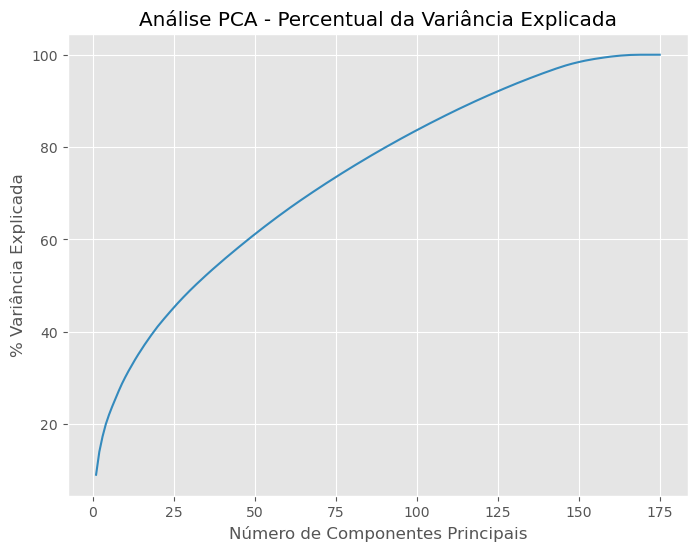

In [19]:
# Aplicar PCA nos dados escalonados
pca = PCA().fit(scaled_data)  # Fit do PCA nos dados escalonados

# Variância explicada por cada componente
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100  # Cálculo da variância acumulada

# Plotando o gráfico de variância explicada
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, linestyle='-', color='#348ABD')
plt.title('Análise PCA - Percentual da Variância Explicada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('% Variância Explicada')
plt.grid(True)
plt.show()

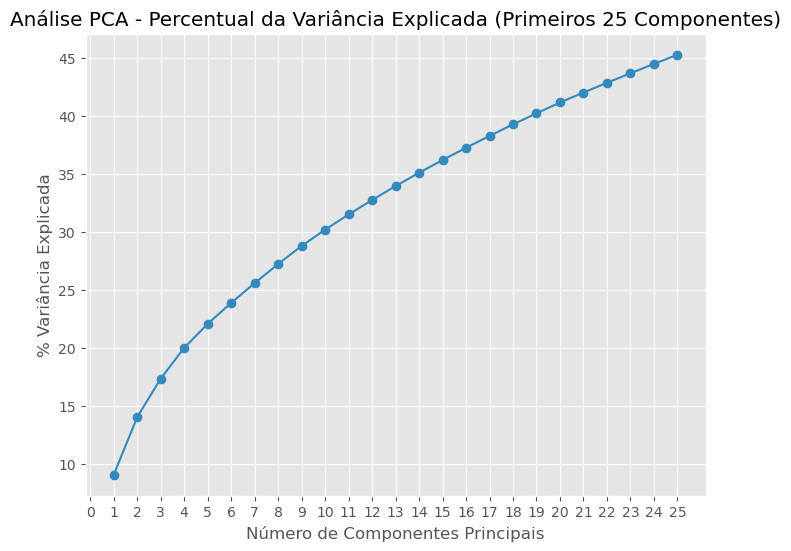

In [21]:
# Aplicar PCA nos dados escalonados
pca = PCA().fit(scaled_data)  # Fit do PCA nos dados escalonados

# Variância explicada por cada componente
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100  # Cálculo da variância acumulada

max_components = 25

# Plotando o gráfico de variância explicada até os 25 primeiros componentes
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_components + 1), explained_variance[:max_components], marker='o', linestyle='-', color='#348ABD')
plt.title('Análise PCA - Percentual da Variância Explicada (Primeiros 25 Componentes)')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('% Variância Explicada')
plt.xticks(np.arange(0, max_components + 1, 1))
plt.grid(True)
plt.show()

In [23]:
# Reduzir para 2 componentes principais
#Aplicando PCA
pca_data = PCA(n_components=2).fit_transform(scaled_data)

In [25]:
# Ajustar o PCA aos dados
pca = PCA(n_components=2) 
pca.fit(scaled_data)  

# Recuperar os componentes principais
components = pd.DataFrame(pca.components_, columns=numerical_cols)

# Exibir a contribuição de cada variável para cada componente
for i, component in enumerate(components.iterrows()):
    print(f"Componente Principal {i+1}:")
    print(component[1].sort_values(ascending=False))
    print("\n")

Componente Principal 1:
IN_ORGAO_NENHUM               0.126183
IN_EQUIP_NENHUM               0.124519
IN_MATERIAL_PED_NENHUM        0.120127
IN_LIXO_QUEIMA                0.109014
IN_EDUCACAO_INDIGENA          0.103582
                                ...   
IN_INTERNET_ADMINISTRATIVO   -0.132529
IN_MATERIAL_PED_DESPORTIVA   -0.136611
IN_SALA_PROFESSOR            -0.136865
IN_LIXO_SERVICO_COLETA       -0.147685
IN_COMPUTADOR                -0.152495
Name: 0, Length: 175, dtype: float64


Componente Principal 2:
IN_RESERVA_RENDA             0.260123
IN_RESERVA_PCD               0.260079
IN_RESERVA_PPI               0.259973
IN_RESERVA_PUBLICA           0.253009
IN_EXAME_SELECAO             0.227965
                               ...   
TP_LOCAL                    -0.087905
IN_ESGOTO_REDE_PUBLICA      -0.094079
IN_AGUA_REDE_PUBLICA        -0.105073
CO_UF                       -0.106716
IN_ORGAO_ASS_PAIS_MESTRES   -0.121482
Name: 1, Length: 175, dtype: float64




In [27]:
# Aplicar UMAP para reduzir a dimensionalidade
umap_reducer = umap.UMAP(n_components=15, random_state=42)
umap_data = umap_reducer.fit_transform(scaled_data)

C:\Users\machi\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Modelagem dos dados

### Testes para definição dos parâmetros

##### K-MEANS - Escalonado

In [ ]:
# Lista para armazenar as somas das distâncias quadráticas (inércia)
inertia = []

# Testando valores de k de 1 a 5 para o teste do cotovelo
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o', color='#348ABD')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)')
plt.title('Teste do Cotovelo para Determinação do Número Ideal de Clusters')
plt.show()

In [ ]:
silhouette_scores = []

# Testando valores de n_clusters de 2 a 5
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Para n_clusters = {n_clusters}, o índice de silhueta médio é: {silhouette_avg:.3f}')

# Plotando o gráfico Silhouette
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o',color='#348ABD')
plt.title('Índice de Silhueta Médio por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta Médio')
plt.grid(True)
plt.show()

##### K-MEANS - PCA

In [ ]:
# Lista para armazenar as somas das distâncias quadráticas (inércia)
inertia = []

# Testando valores de k de 1 a 5 para o teste do cotovelo
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o', color='#348ABD')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)')
plt.title('Teste do Cotovelo para Determinação do Número Ideal de Clusters')
plt.show()

In [ ]:
silhouette_scores = []

# Testando valores de n_clusters de 2 a 5
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Para n_clusters = {n_clusters}, o índice de silhueta médio é: {silhouette_avg:.3f}')

# Plotando o gráfico Silhouette
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o',color='#348ABD')
plt.title('Índice de Silhueta Médio por Número de Clusters (PCA)')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta Médio')
plt.grid(True)
plt.show()

##### K-MEANS - UMAP

In [ ]:
# Lista para armazenar as somas das distâncias quadráticas (inércia)
inertia = []

# Testando valores de k de 1 a 5 para o teste do cotovelo
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(umap_data)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o', color='#348ABD')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Soma das Distâncias Quadráticas)')
plt.title('Teste do Cotovelo para Determinação do Número Ideal de Clusters')
plt.show()

In [ ]:
silhouette_scores = []

# Testando valores de n_clusters de 2 a 5
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(umap_data)
    silhouette_avg = silhouette_score(umap_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Para n_clusters = {n_clusters}, o índice de silhueta médio é: {silhouette_avg:.3f}')

# Plotando o gráfico Silhouette
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o',color='#348ABD')
plt.title('Índice de Silhueta Médio por Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta Médio')
plt.grid(True)
plt.show()

##### HDBSCAN - UMAP

In [ ]:
# Função para calcular o número de clusters e outliers para cada valor de min_cluster_size
min_cluster_sizes = [60, 80, 100, 120, 140, 160, 180, 190, 200, 220, 240, 260, 280, 300, 320, 340, 360, 400, 420, 440, 460]
clusters_sizes = []
num_outliers = []

for min_cluster_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    cluster_labels = clusterer.fit_predict(umap_data)

    clusters_sizes.append(len(set(clusterer.labels_)))
    num_outliers.append(sum(clusterer.labels_ == -1))

# Gráfico 1: min_cluster_size x quantidade de clusters
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(min_cluster_sizes, clusters_sizes, marker='o')
plt.title('Quantidade de Clusters x min_cluster_size')
plt.xlabel('min_cluster_size')
plt.ylabel('Quantidade de Clusters')
plt.grid(True)
plt.show()

# Gráfico 2: min_cluster_size x quantidade de outliers
plt.figure(figsize=(10, 5))
plt.plot(min_cluster_sizes, num_outliers, marker='o', color='red')
plt.title('Quantidade de Outliers x min_cluster_size')
plt.xlabel('min_cluster_size')
plt.ylabel('Quantidade de Outliers')
plt.grid(True)
plt.show()


#### GMM - Escalonado

In [ ]:
# Testando com componentes de 2 a 5
n_components_range = range(2, 6) 
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(scaled_data)
    bics.append(gmm.bic(scaled_data))
    aics.append(gmm.aic(scaled_data))

# Plotar BIC e AIC
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Número de Componentes (Clusters)')
plt.ylabel('BIC / AIC')
plt.title('Ajuste do número de clusters usando BIC e AIC')
plt.legend()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Testando valores de n_components de 2 a 5
for n_components in range(2, 6):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(scaled_data)
    
    # Obtendo os rótulos dos clusters
    cluster_labels = gmm.predict(scaled_data)
    
    # Calculando o índice de silhueta
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(scaled_data)
    
    print(f'Para n_components = {n_components}, o índice de silhueta médio é: {silhouette_avg:.3f}')

# Plotando o gráfico Silhouette
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='#348ABD')
plt.title('Índice de Silhueta Médio por Número de Componentes (PCA)')
plt.xlabel('Número de Componentes (Clusters)')
plt.ylabel('Índice de Silhueta Médio')
plt.grid(True)
plt.show()

#### GMM - PCA

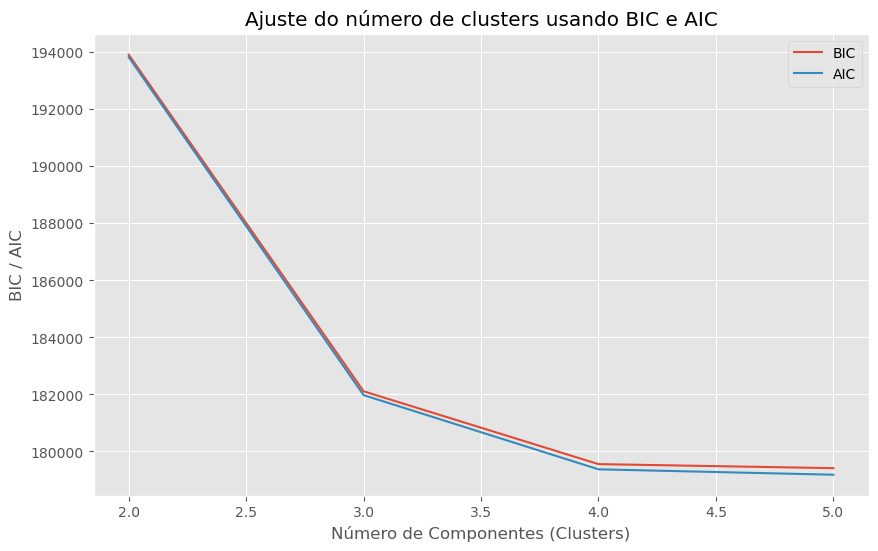

In [29]:
# Teste vários números de componentes e escolha o melhor com base no BIC e AIC
n_components_range = range(2, 6) 
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_data)
    bics.append(gmm.bic(pca_data))
    aics.append(gmm.aic(pca_data))

# Plotar BIC e AIC
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Número de Componentes (Clusters)')
plt.ylabel('BIC / AIC')
plt.title('Ajuste do número de clusters usando BIC e AIC')
plt.legend()
plt.show()

Para n_components = 2, o índice de silhueta médio é: 0.597
Para n_components = 3, o índice de silhueta médio é: 0.647
Para n_components = 4, o índice de silhueta médio é: 0.441
Para n_components = 5, o índice de silhueta médio é: 0.361


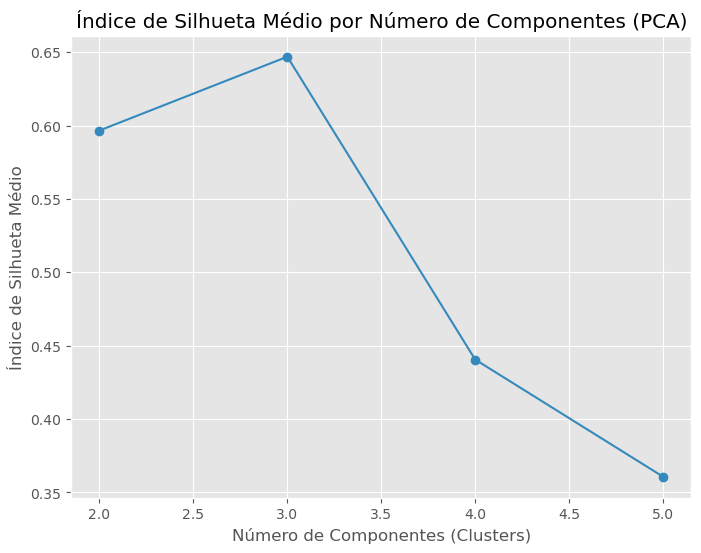

In [31]:
silhouette_scores = []

# Testando valores de n_components de 2 a 5
for n_components in range(2, 6):
    gmm = GaussianMixture(n_components=n_components, random_state=0, covariance_type='spherical')
    gmm.fit(pca_data)
    
    # Obtendo os rótulos dos clusters
    cluster_labels = gmm.predict(pca_data)
    
    # Calculando o índice de silhueta
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f'Para n_components = {n_components}, o índice de silhueta médio é: {silhouette_avg:.3f}')

# Plotando o gráfico Silhouette
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='#348ABD')
plt.title('Índice de Silhueta Médio por Número de Componentes (PCA)')
plt.xlabel('Número de Componentes (Clusters)')
plt.ylabel('Índice de Silhueta Médio')
plt.grid(True)
plt.show()

### Implementação dos modelos

#### K-means - Escalonado

In [ ]:
k_means_escalonado = rend_escolar_consolidado_v2.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
k_means_escalonado['Cluster'] = kmeans.fit_predict(scaled_data)

#### K-means - PCA

In [ ]:
k_means_pca = rend_escolar_consolidado_v2.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
k_means_pca['Cluster'] = kmeans.fit_predict(pca_data)

#### K-means - UMAP

In [ ]:
k_means_umap = rend_escolar_consolidado_v2.copy()

kmeans = KMeans(n_clusters=3, random_state=0)
k_means_umap['Cluster'] = kmeans.fit_predict(umap_data)

#### HDBSCAN - UMAP

In [ ]:
hdbscan_umap = rend_escolar_consolidado_v2.copy()

hdbscan = hdbscan.HDBSCAN(min_cluster_size=400)
hdbscan_umap['Cluster'] = hdbscan.fit_predict(umap_data)

#### HDBSCAN - PCA

In [ ]:
hdbscan_pca = rend_escolar_consolidado_v2.copy()

hdbscan = hdbscan.HDBSCAN(min_cluster_size=440)
hdbscan_pca['Cluster'] = hdbscan.fit_predict(pca_data)

#### GMM - PCA

In [33]:
gmm_pca = rend_escolar_consolidado_v2.copy()

gmm = GaussianMixture(n_components=3, random_state=0, covariance_type='spherical')  
gmm_pca['Cluster'] = gmm.fit_predict(pca_data)

### Resultados do modelo 

#### K-means - Escalonado

In [ ]:
# Contagem de registros por cluster
cluster_counts = k_means_escalonado['Cluster'].value_counts()
print("\nContagem de registros por cluster:")
print(cluster_counts)

In [ ]:
# Exibição das médias das variáveis por cluster
cluster_means = k_means_escalonado.groupby('Cluster').mean()
print(cluster_means)

In [ ]:
# Redução de dimensionalidade com PCA para visualizar a homogeneidade dos clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotando os clusters para melhor visualização
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=k_means_escalonado['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters com K-Means')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### K-means - PCA

In [ ]:
# Contagem de registros por cluster
cluster_counts = k_means_pca['Cluster'].value_counts()
print("\nContagem de registros por cluster:")
print(cluster_counts)

In [ ]:
# Exibição das médias das variáveis por cluster
cluster_means = k_means_pca.groupby('Cluster').mean()
print(cluster_means)

In [ ]:
# Redução de dimensionalidade com PCA para visualizar a homogeneidade dos clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotando os clusters para melhor visualização
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=k_means_pca['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters com K-Means')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### K-means - UMAP

In [ ]:
# Contagem de registros por cluster
cluster_counts = k_means_umap['Cluster'].value_counts()
print("\nContagem de registros por cluster:")
print(cluster_counts)

In [ ]:
# Exibição das médias das variáveis por cluster
cluster_means = k_means_umap.groupby('Cluster').mean()
print(cluster_means)

In [ ]:
# Redução de dimensionalidade com PCA para visualizar a homogeneidade dos clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotando os clusters para melhor visualização
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=k_means_umap['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters com K-Means')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
# Plotando os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=k_means_pca['Cluster'], cmap='viridis')
plt.title('Visualização dos Clusters com t-SNE')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### HDBSCAN - UMAP

In [ ]:
# Contagem de registros por cluster
cluster_counts = hdbscan_umap['Cluster'].value_counts()
print("\nContagem de registros por cluster:")
print(cluster_counts)

In [ ]:
# Redução de dimensionalidade com PCA para visualizar a homogeneidade dos clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotando os clusters para melhor visualização
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hdbscan_umap['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters com HDBSCAN')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
# Aplicando t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(scaled_data)

# Plotando os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=hdbscan_umap['Cluster'], cmap='viridis')
plt.title('Visualização dos Clusters com t-SNE')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
# Exibição das médias das variáveis por cluster
cluster_means = hdbscan_umap.groupby('Cluster').mean()
print(cluster_means)

#### GMM - PCA

In [37]:
# Contagem de registros por cluster
cluster_counts = gmm_pca['Cluster'].value_counts()
print("\nContagem de registros por cluster:")
print(cluster_counts)


Contagem de registros por cluster:
Cluster
0    17544
1     2367
2      751
Name: count, dtype: int64


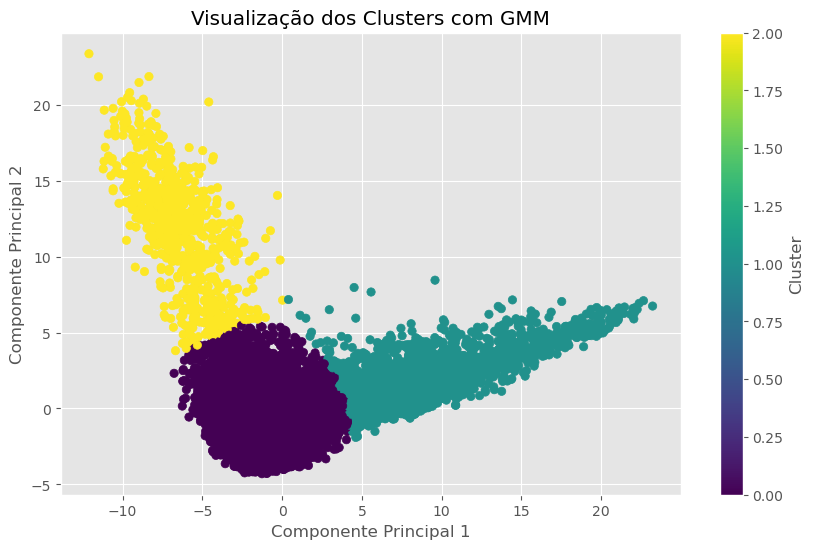

In [39]:
# Redução de dimensionalidade com PCA para visualizar a homogeneidade dos clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotando os clusters para melhor visualização
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_pca['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters com GMM')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [41]:
# Exibição das médias das variáveis por cluster
cluster_means = gmm_pca.groupby('Cluster').mean()
print(cluster_means)

         NO_REGIAO      CO_UF  TP_LOCAL  DEPENDENCIA_ADM  TOTAL_APROVACAO  \
Cluster                                                                     
0         2.427554  16.148199  0.916667         0.015276        91.421683   
1         1.578792  10.059569  0.381073         0.072666        89.589649   
2         2.027963  13.432756  0.849534         0.813582        92.082956   

         TOTAL_REPROVACAO  TOTAL_ABANDONO  MEDIA_IRD  MEDIA_ALUNOS  \
Cluster                                                              
0                5.086115        3.492202   3.085824     27.211394   
1                3.952387        6.457964   3.302239     20.473088   
2                6.732623        1.184421   3.573502     32.194407   

         IN_VINCULO_SEGURANCA_PUBLICA  ...  IN_MEDIACAO_EAD  IN_DIURNO  \
Cluster                                ...                               
0                            0.008949  ...         0.094391   0.987631   
1                            0.001267  ..

In [43]:
# Dicionário de renomeação para clusters
renomear_clusters = {
    0: "Médio_Abandono", 
    1: "Alto_Abandono",
    2: "Baixo_Abandono"  
}

# Substitui os valores na coluna 'Cluster' pelos nomes definidos em renomear_clusters
gmm_pca['Cluster'] = gmm_pca['Cluster'].map(renomear_clusters)

# Verifica se a substituição foi realizada
print(gmm_pca['Cluster'].unique())

['Médio_Abandono' 'Alto_Abandono' 'Baixo_Abandono']


# Insert resultados banco

In [ ]:
# Nome da tabela no banco de dados
#nome_tabela = 'rend_escolar_consolidado'

# Insere o DataFrame no SQL Server, criando a tabela se não existir
#try:
    #gmm_pca.to_sql(nome_tabela, engine, if_exists='replace', index=False)
    #print("Tabela criada e dados inseridos com sucesso!")
#except Exception as e:
    #print(f"Ocorreu um erro ao criar a tabela ou inserir os dados: {e}")

# Interpretação dos Resultados

In [45]:
# Seleciona apenas as colunas que começam com 'IN' (binárias)
in_columns = [col for col in gmm_pca.columns if col.startswith('IN')]
in_columns = ['Cluster'] + in_columns

# Calcula a soma para cada cluster
cluster_summary_sum = gmm_pca[in_columns].groupby('Cluster').sum()

# Contagem de registros por cluster
cluster_counts = gmm_pca['Cluster'].value_counts()
cluster_analysis_v3 = {}

for cluster in cluster_summary_sum.index:
    # Quantidade de registros no cluster atual
    qt_registros = cluster_counts[cluster]
    
    # Dicionário para armazenar dados de cada coluna para o cluster
    colunas_info = {}
    for column in cluster_summary_sum.columns:
        # Soma da variável para o cluster
        soma = cluster_summary_sum.loc[cluster, column]
        porcentagem = (soma * 100) / qt_registros if qt_registros > 0 else 0
        
        colunas_info[column] = {
            'Soma': soma,
            'Qt_registros': qt_registros,
            'Porcentagem': porcentagem
        }
    
    # Ordena colunas dentro do cluster por Porcentagem em ordem decrescente
    cluster_analysis_v3[f"Cluster_{cluster}"] = dict(sorted(colunas_info.items(), key=lambda x: x[1]['Porcentagem'], reverse=True))

# Exibe o resultado ordenado
for cluster, columns in cluster_analysis_v3.items():
    # primeiras 20 colunas
    df_cluster = pd.DataFrame(columns).T.head(20)
    print(f"Tabela para {cluster}")
    print(df_cluster)
    print("\n")

Tabela para Cluster_Alto_Abandono
                                  Soma  Qt_registros  Porcentagem
IN_TRATAMENTO_LIXO_INEXISTENTE  2065.0        2367.0    87.241234
IN_DIURNO                       2056.0        2367.0    86.861005
IN_COZINHA                      2021.0        2367.0    85.382341
IN_INTERNET                     1918.0        2367.0    81.030841
IN_ESP                          1848.0        2367.0    78.073511
IN_ESP_CC                       1848.0        2367.0    78.073511
IN_INTERNET_ADMINISTRATIVO      1759.0        2367.0    74.313477
IN_AGUA_POTAVEL                 1649.0        2367.0    69.666244
IN_NOTURNO                      1630.0        2367.0    68.863540
IN_ESGOTO_FOSSA                 1573.0        2367.0    66.455429
IN_ACESSIBILIDADE_INEXISTENTE   1513.0        2367.0    63.920575
IN_SECRETARIA                   1507.0        2367.0    63.667089
IN_SALA_DIRETORIA               1468.0        2367.0    62.019434
IN_BANDA_LARGA                  1459.0    

### Caracterização do perfil escolar dos clusters 

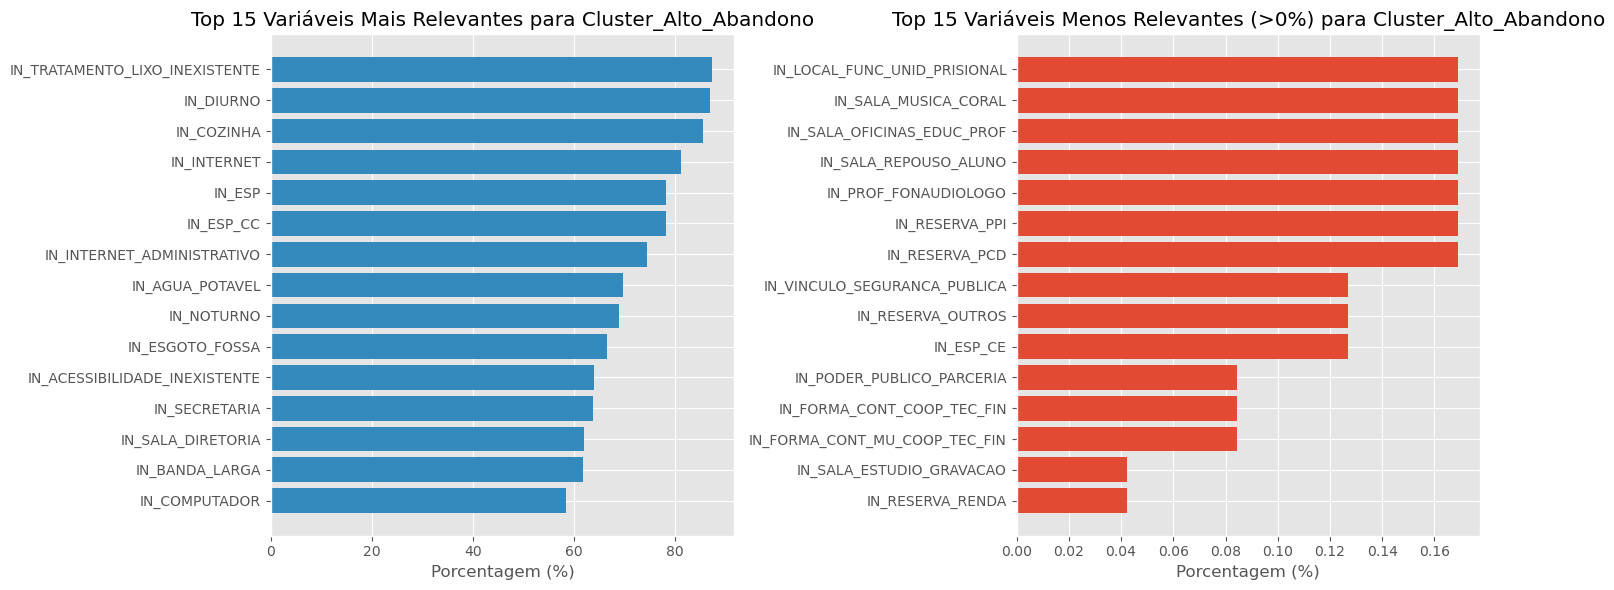

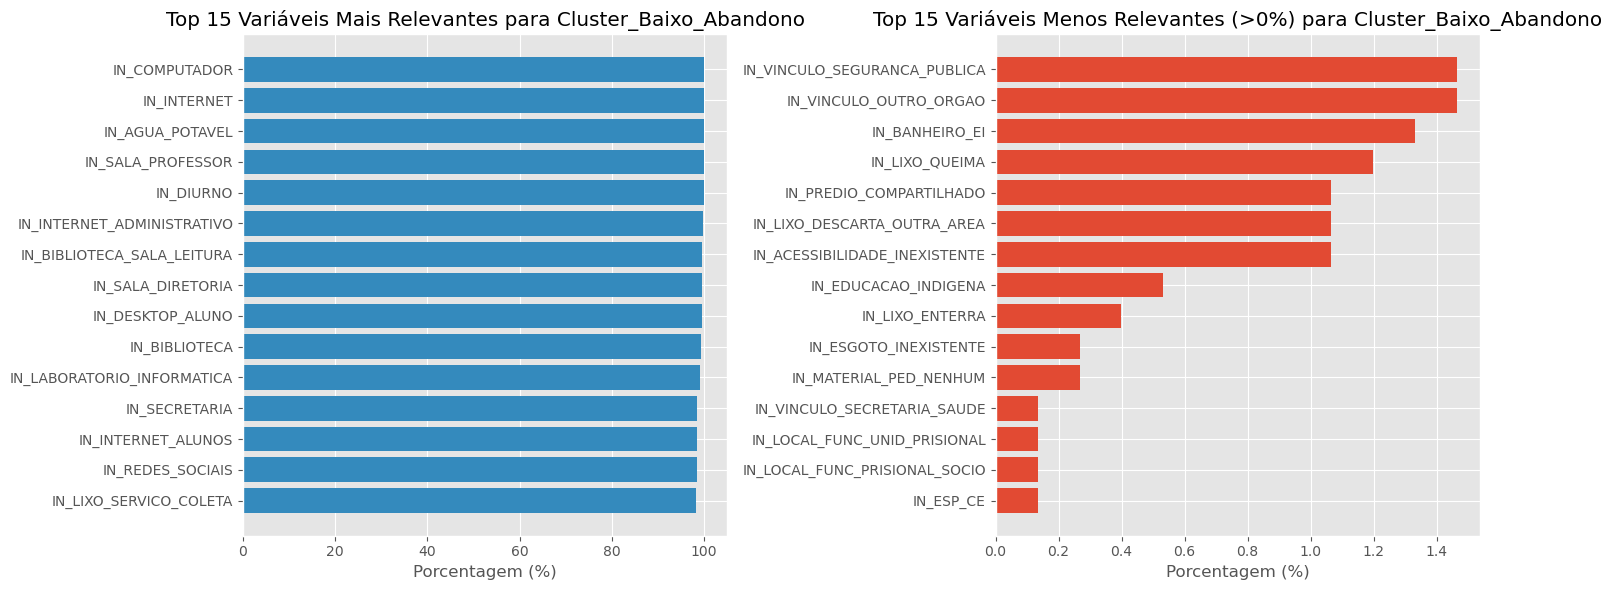

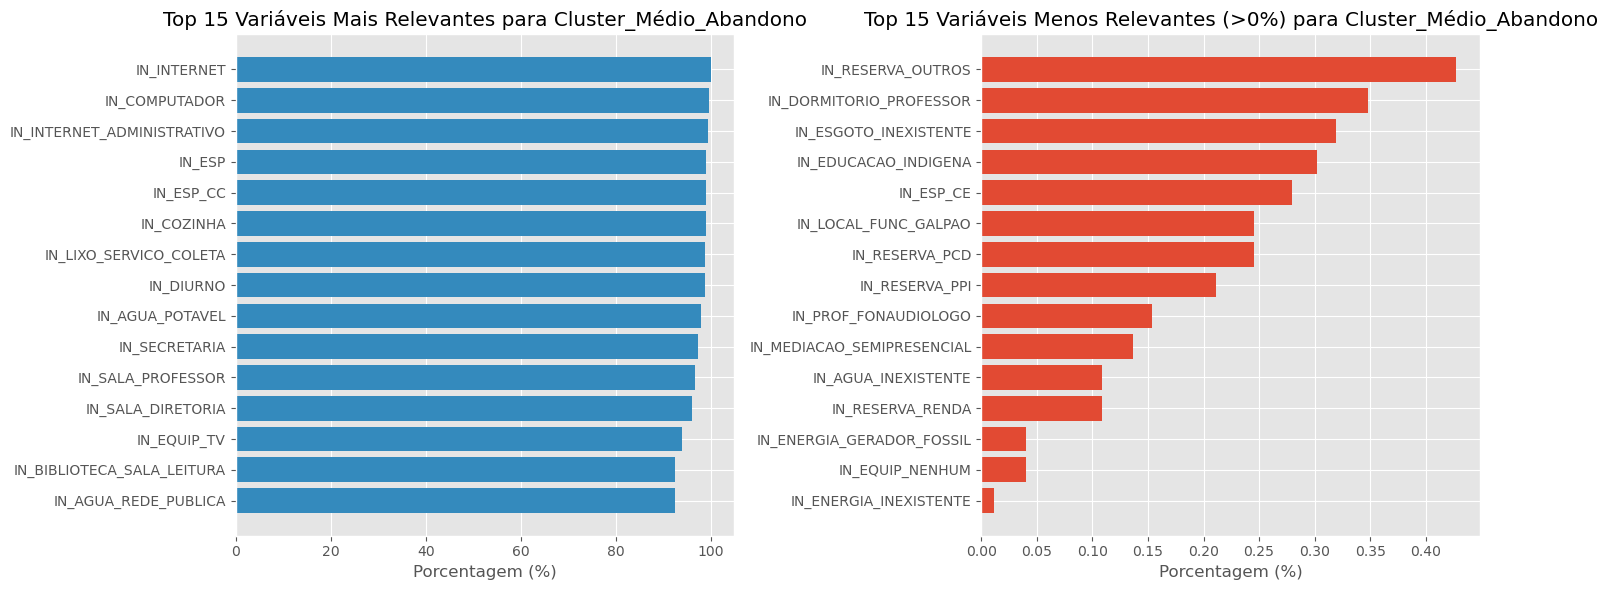

In [49]:
for cluster, columns in cluster_analysis_v3.items():
    # Ordena as colunas pelo valor de 'Porcentagem'
    sorted_columns = sorted(columns.items(), key=lambda x: x[1]['Porcentagem'], reverse=True)
    
    # Seleciona as 10 variáveis mais relevantes (maiores porcentagens)
    top_columns = sorted_columns[:15]
    variaveis_top = [item[0] for item in top_columns]
    porcentagens_top = [item[1]['Porcentagem'] for item in top_columns]
    
    # Seleciona as 15 variáveis menos relevantes com porcentagem > 0
    bottom_columns = [col for col in sorted_columns if col[1]['Porcentagem'] > 0][-15:]
    variaveis_bottom = [item[0] for item in bottom_columns]
    porcentagens_bottom = [item[1]['Porcentagem'] for item in bottom_columns]

    # Configuração dos gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico para as 10 variáveis mais relevantes
    axes[0].barh(variaveis_top, porcentagens_top, color='#348ABD')
    axes[0].set_xlabel('Porcentagem (%)')
    axes[0].set_title(f'Top 15 Variáveis Mais Relevantes para {cluster}')
    axes[0].invert_yaxis()
    
    # Gráfico para as 10 variáveis menos relevantes com porcentagem > 0
    axes[1].barh(variaveis_bottom, porcentagens_bottom)
    axes[1].set_xlabel('Porcentagem (%)')
    axes[1].set_title(f'Top 15 Variáveis Menos Relevantes (>0%) para {cluster}')
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

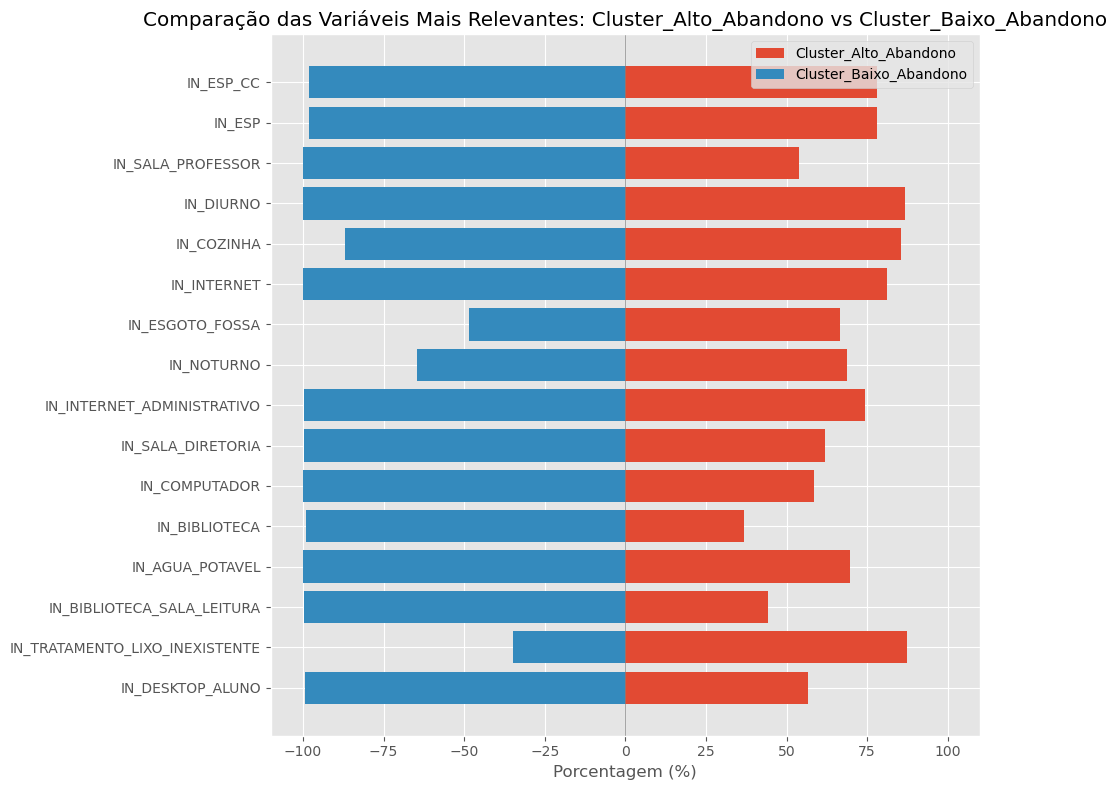

In [53]:
# Clusters a serem comparados
cluster_a = "Cluster_Alto_Abandono"
cluster_b = "Cluster_Baixo_Abandono"

# Seleciona as 10 variáveis mais relevantes para cada cluster
top_columns_a = sorted(cluster_analysis_v3[cluster_a].items(), key=lambda x: x[1]['Porcentagem'], reverse=True)[:10]
top_columns_b = sorted(cluster_analysis_v3[cluster_b].items(), key=lambda x: x[1]['Porcentagem'], reverse=True)[:10]

# Constrói um conjunto unificado das variáveis importantes para ambos os clusters
# de forma que cada variável apareça apenas uma vez no conjunto final
variaveis_unificadas = list({item[0] for item in top_columns_a} | {item[0] for item in top_columns_b})

# Se houver mais de 20 variáveis devido a duplicatas nos top 10 de cada cluster,
# limite a lista a 20 variáveis
if len(variaveis_unificadas) > 20:
    variaveis_unificadas = variaveis_unificadas[:20]

# Extrai os valores de porcentagem para cada variável em cada cluster,
# preenchendo com 0 se a variável não estiver presente no top 10 do cluster específico
porcentagens_a = [cluster_analysis_v3[cluster_a].get(var, {'Porcentagem': 0})['Porcentagem'] for var in variaveis_unificadas]
porcentagens_b = [cluster_analysis_v3[cluster_b].get(var, {'Porcentagem': 0})['Porcentagem'] for var in variaveis_unificadas]

fig, ax = plt.subplots(figsize=(10, 8))

# Plota as barras para Cluster A à direita
ax.barh(variaveis_unificadas, porcentagens_a, label=cluster_a)

# Plota as barras para Cluster B a esquerda
ax.barh(variaveis_unificadas, [-p for p in porcentagens_b], label=cluster_b)

ax.set_xlabel("Porcentagem (%)")
ax.set_title(f"Comparação das Variáveis Mais Relevantes: {cluster_a} vs {cluster_b}")
ax.legend(loc="upper right")

ax.axvline(0, color="gray", linewidth=0.5)
limite_max = max(max(porcentagens_a), max(porcentagens_b)) * 1.1
ax.set_xlim(-limite_max, limite_max)

plt.tight_layout()
plt.show()

In [55]:
# Dicionário de categorias e as variáveis associadas
categorias = {
    "Vínculo com Órgãos Públicos": [
        "IN_VINCULO_SECRETARIA_EDUCACAO", "IN_VINCULO_SEGURANCA_PUBLICA", "IN_VINCULO_SECRETARIA_SAUDE", "IN_VINCULO_OUTRO_ORGAO"
    ],
    "Local de Funcionamento da Escola": [
        "IN_LOCAL_FUNC_PREDIO_ESCOLAR", "IN_LOCAL_FUNC_SOCIOEDUCATIVO", "IN_LOCAL_FUNC_UNID_PRISIONAL",
        "IN_LOCAL_FUNC_PRISIONAL_SOCIO", "IN_LOCAL_FUNC_GALPAO", "IN_LOCAL_FUNC_SALAS_OUTRA_ESC",
        "IN_LOCAL_FUNC_OUTROS"
    ],
    "Abastecimento de Água": [
        "IN_AGUA_POTAVEL", "IN_AGUA_REDE_PUBLICA", "IN_AGUA_POCO_ARTESIANO", 
        "IN_AGUA_CACIMBA", "IN_AGUA_FONTE_RIO"
    ],
    "Esgoto Sanitário": [
        "IN_ESGOTO_REDE_PUBLICA", "IN_ESGOTO_FOSSA_SEPTICA", "IN_ESGOTO_FOSSA_COMUM", "IN_ESGOTO_FOSSA"
    ],
    "Destinação e Tratamento do Lixo": [
        "IN_LIXO_SERVICO_COLETA", "IN_LIXO_QUEIMA", "IN_LIXO_ENTERRA", 
        "IN_LIXO_DESTINO_FINAL_PUBLICO", "IN_LIXO_DESCARTA_OUTRA_AREA",
        "IN_TRATAMENTO_LIXO_SEPARACAO", "IN_TRATAMENTO_LIXO_REUTILIZA", "IN_TRATAMENTO_LIXO_RECICLAGEM"
    ],
    "Dependências Físicas": [
        "IN_ALMOXARIFADO", "IN_AREA_VERDE", "IN_AUDITORIO", "IN_BANHEIRO", "IN_BANHEIRO_EI", 
        "IN_BANHEIRO_PNE", "IN_BANHEIRO_FUNCIONARIOS", "IN_BANHEIRO_CHUVEIRO", "IN_BIBLIOTECA", 
        "IN_BIBLIOTECA_SALA_LEITURA", "IN_COZINHA", "IN_DESPENSA", "IN_DORMITORIO_ALUNO",
        "IN_DORMITORIO_PROFESSOR", "IN_LABORATORIO_CIENCIAS", "IN_LABORATORIO_INFORMATICA",
        "IN_LABORATORIO_EDUC_PROF", "IN_PATIO_COBERTO", "IN_PATIO_DESCOBERTO", "IN_PARQUE_INFANTIL",
        "IN_PISCINA", "IN_QUADRA_ESPORTES", "IN_QUADRA_ESPORTES_COBERTA", "IN_QUADRA_ESPORTES_DESCOBERTA",
        "IN_REFEITORIO", "IN_SALA_ATELIE_ARTES", "IN_SALA_MUSICA_CORAL", "IN_SALA_ESTUDIO_DANCA",
        "IN_SALA_MULTIUSO", "IN_SALA_ESTUDIO_GRAVACAO", "IN_SALA_OFICINAS_EDUC_PROF", "IN_SALA_DIRETORIA",
        "IN_SALA_LEITURA", "IN_SALA_PROFESSOR", "IN_SALA_REPOUSO_ALUNO", "IN_SECRETARIA",
        "IN_SALA_ATENDIMENTO_ESPECIAL", "IN_TERREIRAO", "IN_VIVEIRO", "IN_DEPENDENCIAS_OUTRAS"
    ],
    "Recursos de Acessibilidade": [
        "IN_ACESSIBILIDADE_CORRIMAO", "IN_ACESSIBILIDADE_ELEVADOR", "IN_ACESSIBILIDADE_PISOS_TATEIS", 
        "IN_ACESSIBILIDADE_VAO_LIVRE", "IN_ACESSIBILIDADE_RAMPAS", "IN_ACESSIBILIDADE_SINAL_SONORO", 
        "IN_ACESSIBILIDADE_SINAL_TATIL", "IN_ACESSIBILIDADE_SINAL_VISUAL"
    ],
    "Equipamentos Administrativos e Pedagógicos": [
        "IN_EQUIP_PARABOLICA", "IN_COMPUTADOR", "IN_EQUIP_COPIADORA", "IN_EQUIP_IMPRESSORA", 
        "IN_EQUIP_IMPRESSORA_MULT", "IN_EQUIP_SCANNER", "IN_EQUIP_DVD", "IN_EQUIP_SOM",
        "IN_EQUIP_TV", "IN_EQUIP_LOUSA_DIGITAL", "IN_EQUIP_MULTIMIDIA"
    ],
    "Internet e Computadores para Alunos": [
        "IN_INTERNET", "IN_INTERNET_ALUNOS", "IN_INTERNET_ADMINISTRATIVO", "IN_INTERNET_APRENDIZAGEM",
        "IN_INTERNET_COMUNIDADE", "IN_ACESSO_INTERNET_COMPUTADOR", "IN_ACES_INTERNET_DISP_PESSOAIS", "IN_BANDA_LARGA"
    ],
    "Profissionais que Atuam na Escola": [
        "IN_PROF_ADMINISTRATIVOS", "IN_PROF_SERVICOS_GERAIS", "IN_PROF_BIBLIOTECARIO", "IN_PROF_SAUDE",
        "IN_PROF_COORDENADOR", "IN_PROF_FONAUDIOLOGO", "IN_PROF_NUTRICIONISTA", "IN_PROF_PSICOLOGO",
        "IN_PROF_ALIMENTACAO", "IN_PROF_PEDAGOGIA", "IN_PROF_SECRETARIO", "IN_PROF_SEGURANCA",
        "IN_PROF_MONITORES", "IN_PROF_GESTAO", "IN_PROF_ASSIST_SOCIAL", "IN_PROF_TRAD_LIBRAS"
    ],
    "Materiais Pedagógicos": [
        "IN_MATERIAL_PED_MULTIMIDIA", "IN_MATERIAL_PED_INFANTIL", "IN_MATERIAL_PED_CIENTIFICO",
        "IN_MATERIAL_PED_DIFUSAO", "IN_MATERIAL_PED_MUSICAL", "IN_MATERIAL_PED_JOGOS",
        "IN_MATERIAL_PED_ARTISTICAS", "IN_MATERIAL_PED_PROFISSIONAL", "IN_MATERIAL_PED_DESPORTIVA",
        "IN_MATERIAL_PED_INDIGENA", "IN_MATERIAL_PED_ETNICO", "IN_MATERIAL_PED_CAMPO",
        "IN_MATERIAL_PED_BIL_SURDOS"
    ],
    "Outros Aspectos da Educação": [
        "IN_EDUCACAO_INDIGENA", "IN_EXAME_SELECAO", "IN_RESERVA_PPI", "IN_RESERVA_RENDA", 
        "IN_RESERVA_PUBLICA", "IN_RESERVA_PCD", "IN_RESERVA_OUTROS", "IN_RESERVA_NENHUMA", 
        "IN_REDES_SOCIAIS", "IN_ESPACO_ATIVIDADE", "IN_ESPACO_EQUIPAMENTO"
    ],
    "Órgãos Colegiados": [
        "IN_ORGAO_ASS_PAIS", "IN_ORGAO_ASS_PAIS_MESTRES", "IN_ORGAO_CONSELHO_ESCOLAR", 
        "IN_ORGAO_GREMIO_ESTUDANTIL", "IN_ORGAO_OUTROS", "IN_ORGAO_NENHUM"
    ],
    "Mediação Didático-Pedagógica": [
        "IN_MEDIACAO_PRESENCIAL", "IN_MEDIACAO_SEMIPRESENCIAL", "IN_MEDIACAO_EAD"
    ],
    "Modo e Turno de Ensino": [
        "IN_REGULAR", "IN_DIURNO", "IN_NOTURNO", "IN_EAD", "IN_PROF", 
        "IN_PROF_TEC", "IN_EJA", "IN_EJA_FUND", "IN_EJA_MED", 
        "IN_ESP", "IN_ESP_CC", "IN_ESP_CE"
    ],
    "Infraestrutura Inexistente": [
        "IN_AGUA_INEXISTENTE", "IN_ENERGIA_INEXISTENTE", "IN_ESGOTO_INEXISTENTE",
        "IN_TRATAMENTO_LIXO_INEXISTENTE", "IN_ACESSIBILIDADE_INEXISTENTE", 
        "IN_EQUIP_NENHUM", "IN_MATERIAL_PED_NENHUM"
    ]
}

In [118]:
# Função para gerar gráficos bidirecionais para cada categoria
def gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categorias, cluster_a="Cluster_Baixo_Abandono", cluster_b="Cluster_Alto_Abandono"):

    # Gera gráficos bidirecionais para cada categoria
    for categoria, variaveis in categorias.items():
        # Extrai as porcentagens para as variáveis relevantes em cada cluster
        porcentagens_a = [cluster_analysis_v3[cluster_a].get(var, {'Porcentagem': 0})['Porcentagem'] for var in variaveis]
        porcentagens_b = [cluster_analysis_v3[cluster_b].get(var, {'Porcentagem': 0})['Porcentagem'] for var in variaveis]

        # Filtra variáveis que possuem 0% em ambos os clusters
        variaveis_filtradas = [var for var, a, b in zip(variaveis, porcentagens_a, porcentagens_b) if a != 0 or b != 0]
        porcentagens_a_filtradas = [a for a, b in zip(porcentagens_a, porcentagens_b) if a != 0 or b != 0]
        porcentagens_b_filtradas = [b for a, b in zip(porcentagens_a, porcentagens_b) if a != 0 or b != 0]

        # Calcula a diferença absoluta entre os clusters
        diferencas = [abs(a - b) for a, b in zip(porcentagens_a_filtradas, porcentagens_b_filtradas)]

        # Ordena as variáveis com base na diferença
        variaveis_ordenadas = [var for _, var in sorted(zip(diferencas, variaveis_filtradas), reverse=True)]
        porcentagens_a_ordenadas = [porc for _, porc in sorted(zip(diferencas, porcentagens_a_filtradas), reverse=True)]
        porcentagens_b_ordenadas = [porc for _, porc in sorted(zip(diferencas, porcentagens_b_filtradas), reverse=True)]

        # Verifica se há variáveis para plotar
        if not variaveis_ordenadas:
            continue

        fig, ax = plt.subplots(figsize=(11, 8))

        # Plota as barras para o Cluster A à direita
        ax.barh(variaveis_ordenadas, porcentagens_a_ordenadas, color="#348ABD", label=cluster_a)

        # Plota as barras para o Cluster B à esquerda
        ax.barh(variaveis_ordenadas, [-p for p in porcentagens_b_ordenadas], color='#e24a33', label=cluster_b)

        ax.invert_yaxis()
        ax.set_xlabel("Porcentagem (%)")
        ax.set_title(f"Comparação das Variáveis na Categoria '{categoria}'")
        #ax.legend(loc="upper right")
        ax.legend(title="Cluster", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
        ax.axvline(0, color="gray", linewidth=0.5)

        limite_max = max(max(porcentagens_a_ordenadas), max(porcentagens_b_ordenadas)) * 1.1
        ax.set_xlim(-limite_max, limite_max)

        plt.tight_layout()
        plt.show()

#### Gráfico para todas as categorias

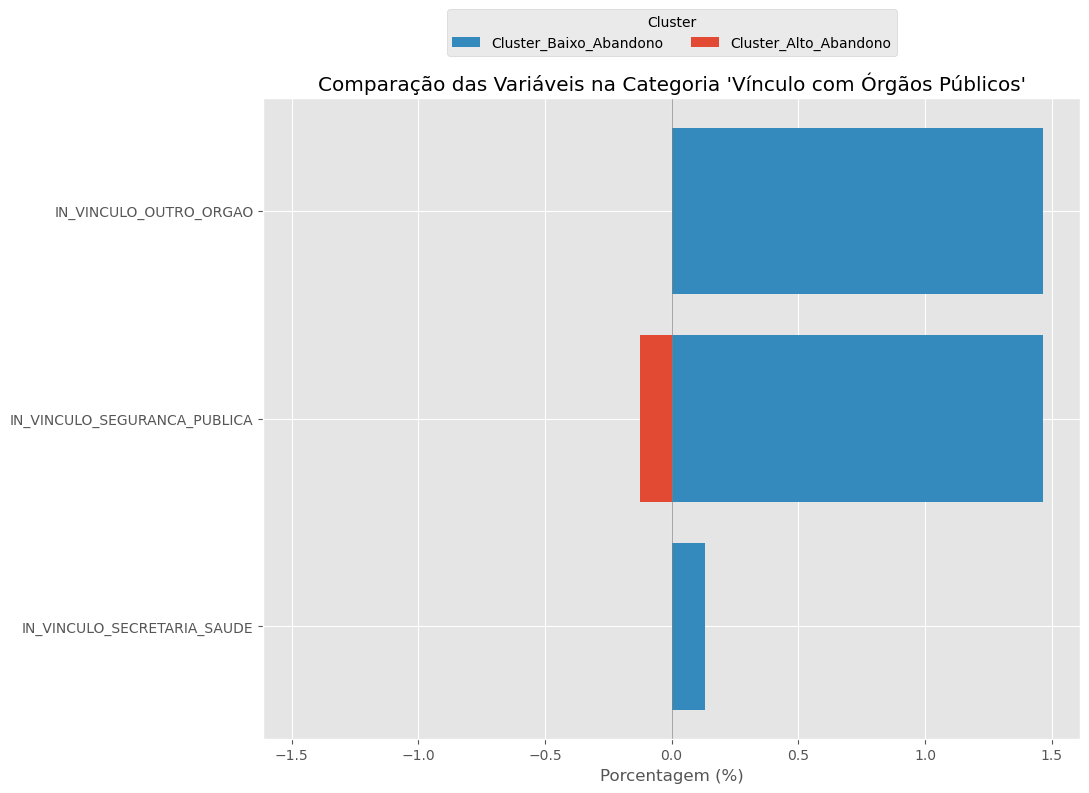

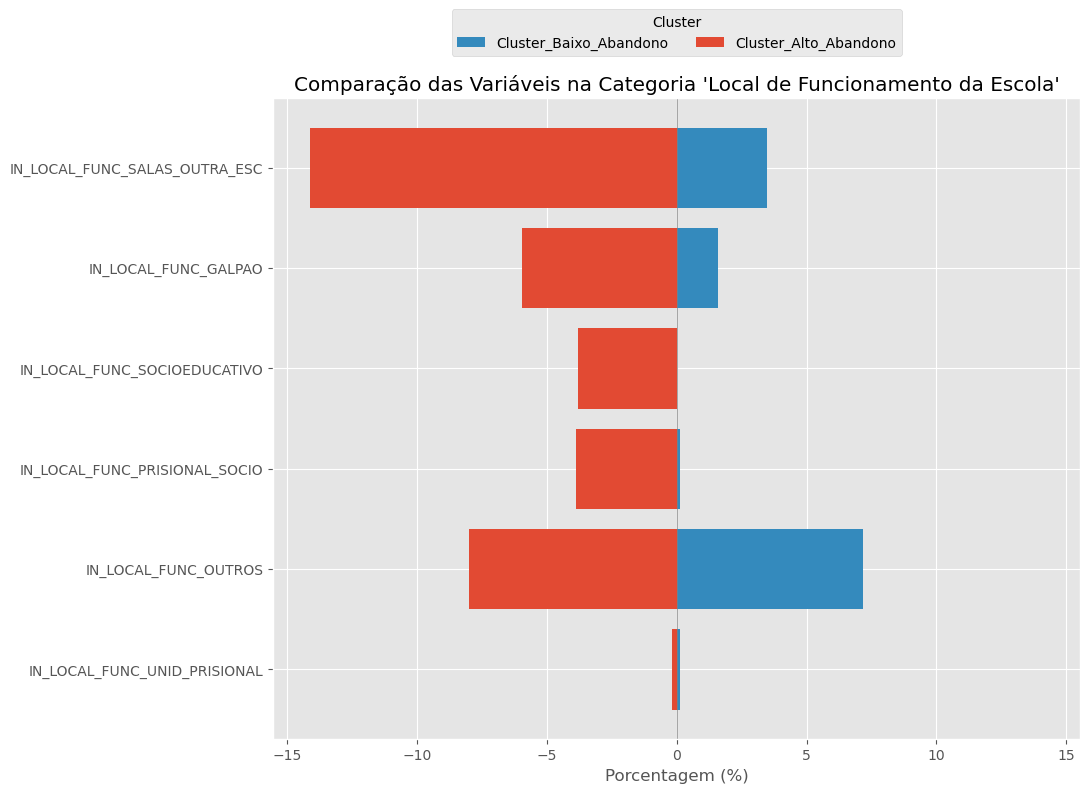

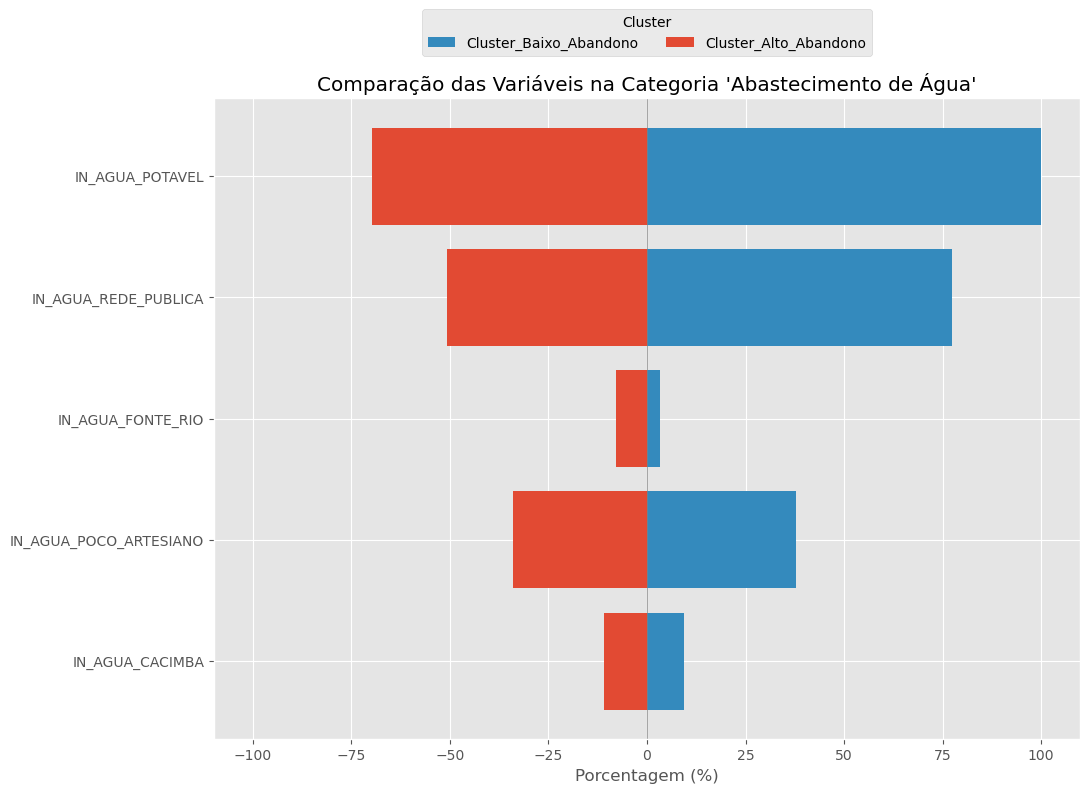

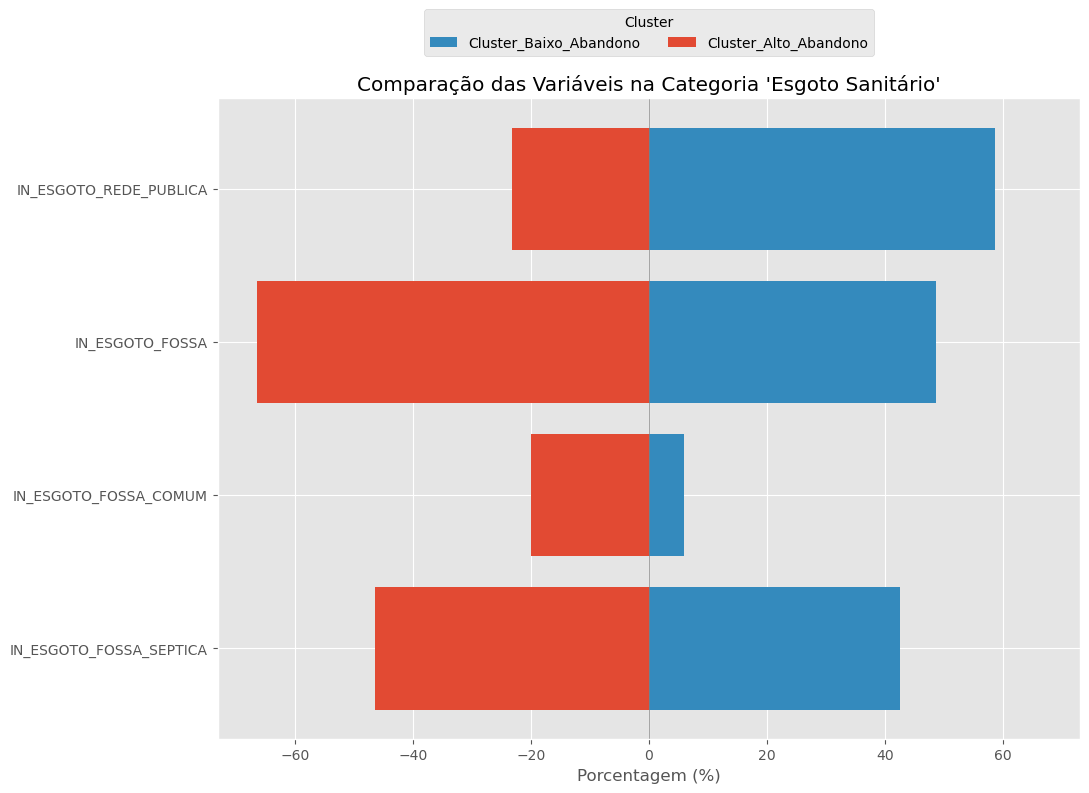

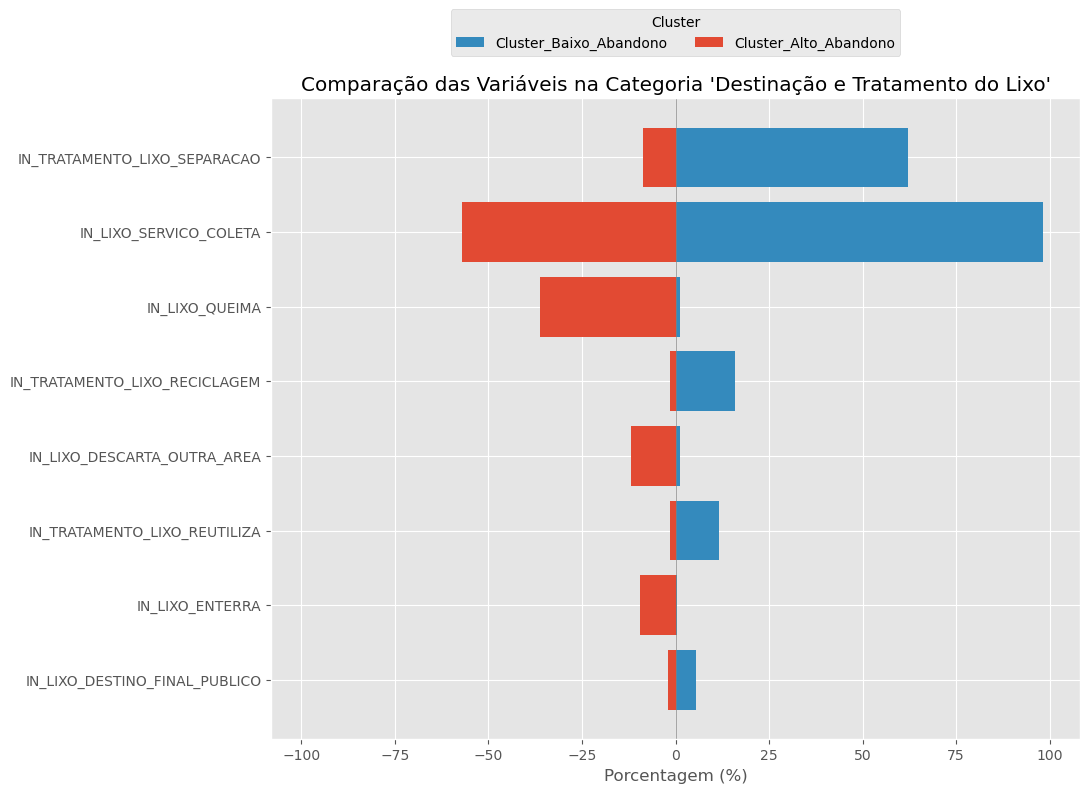

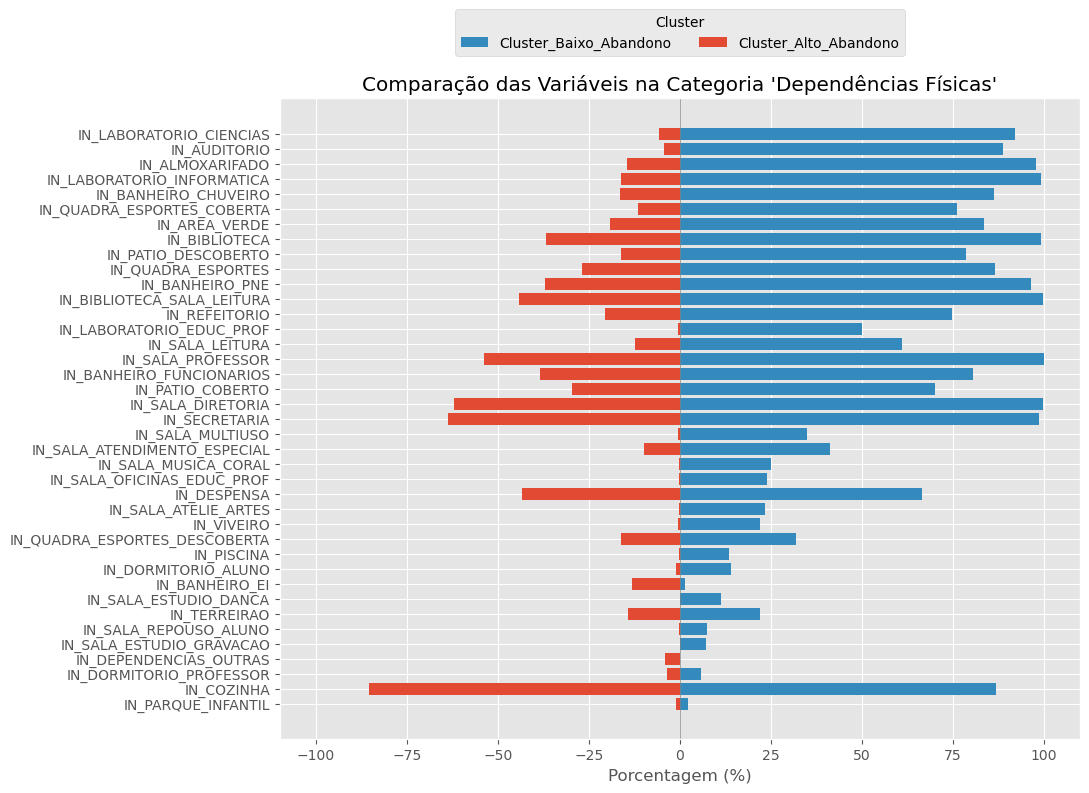

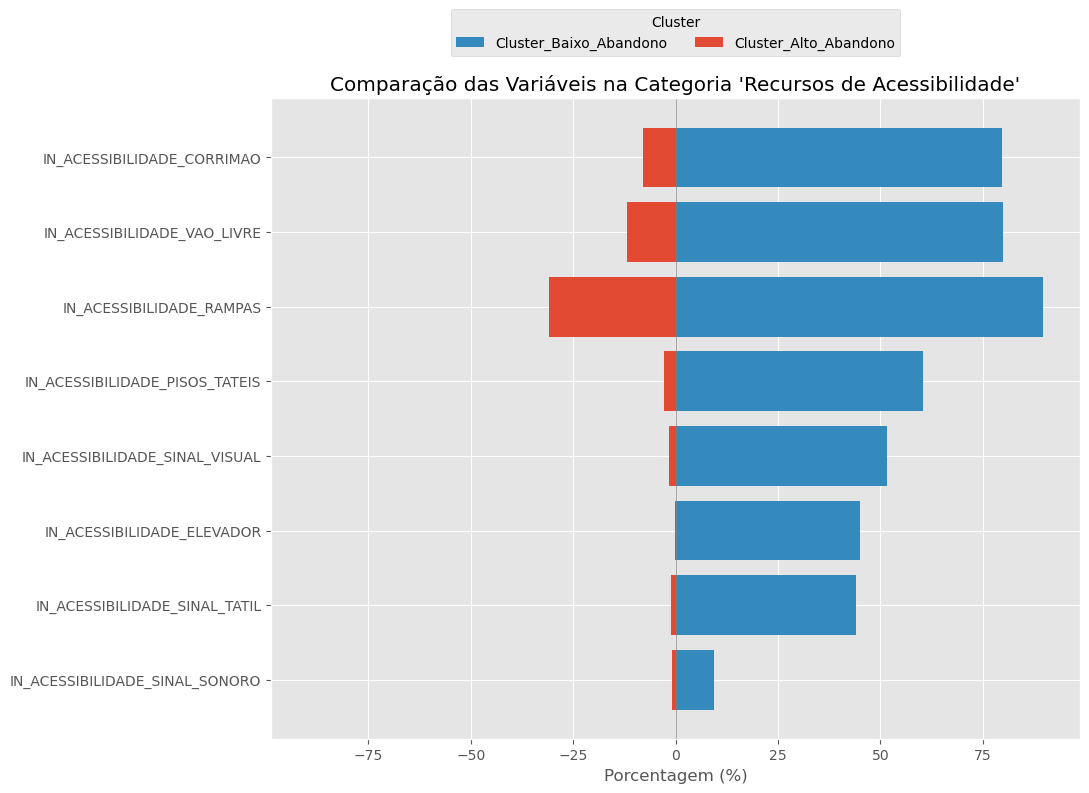

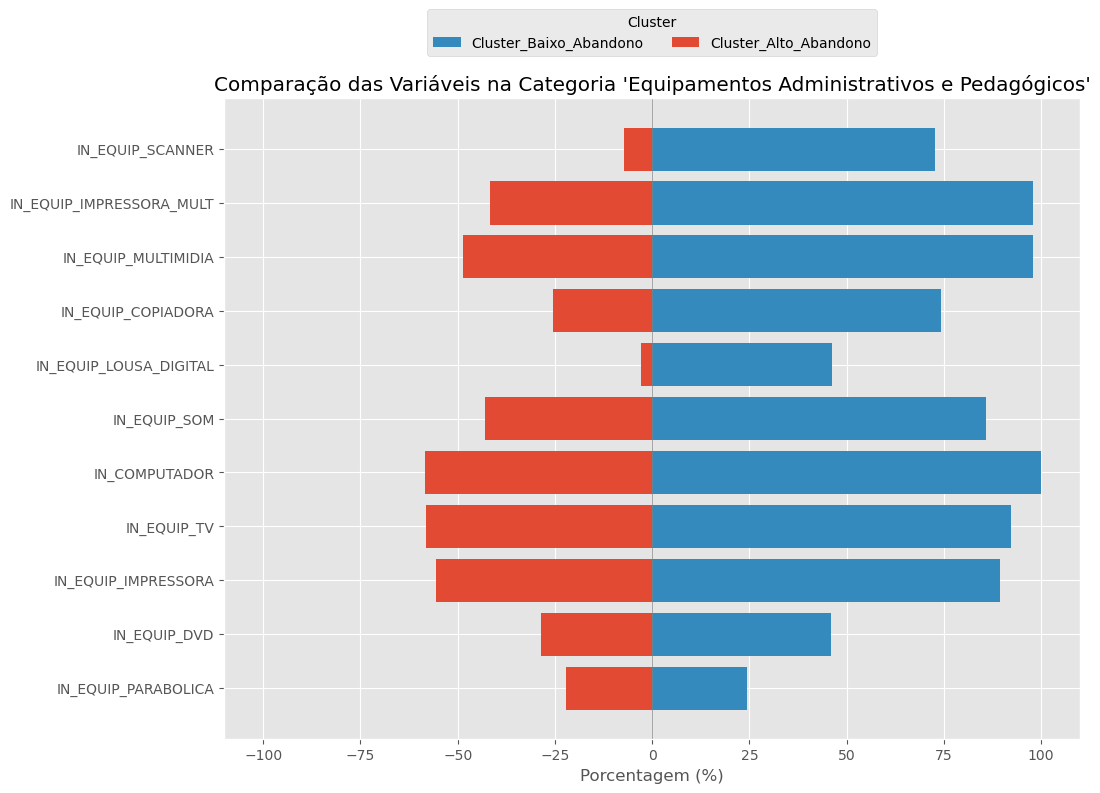

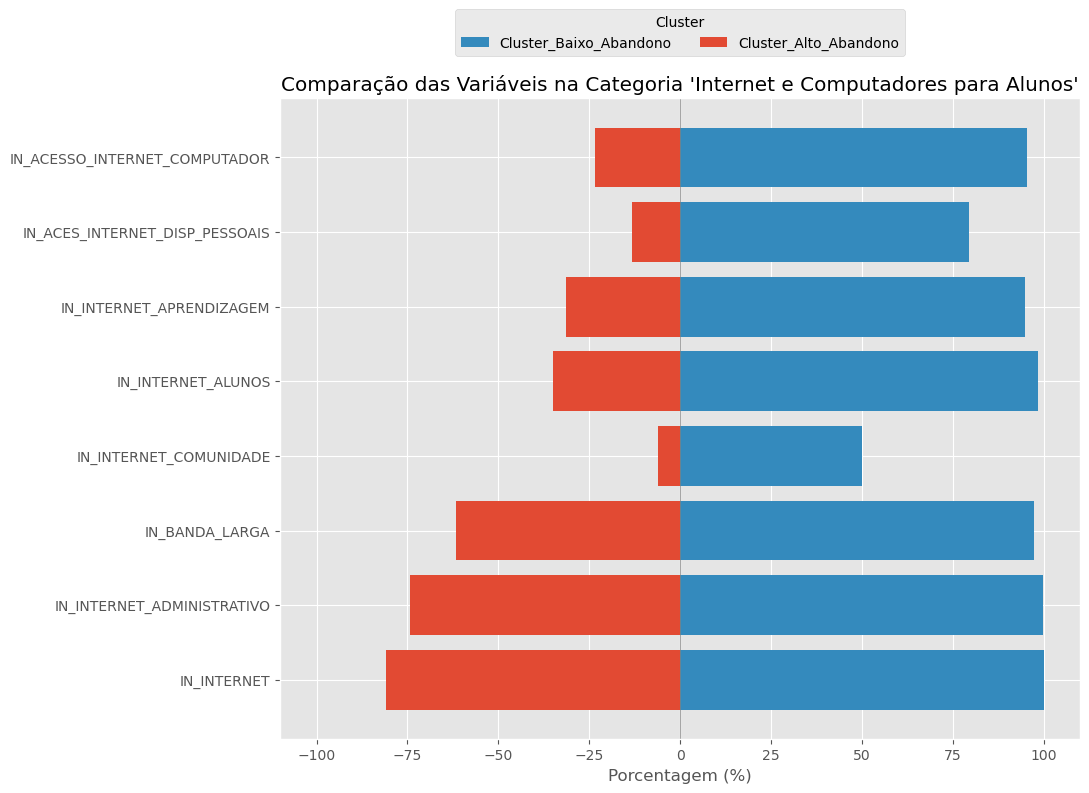

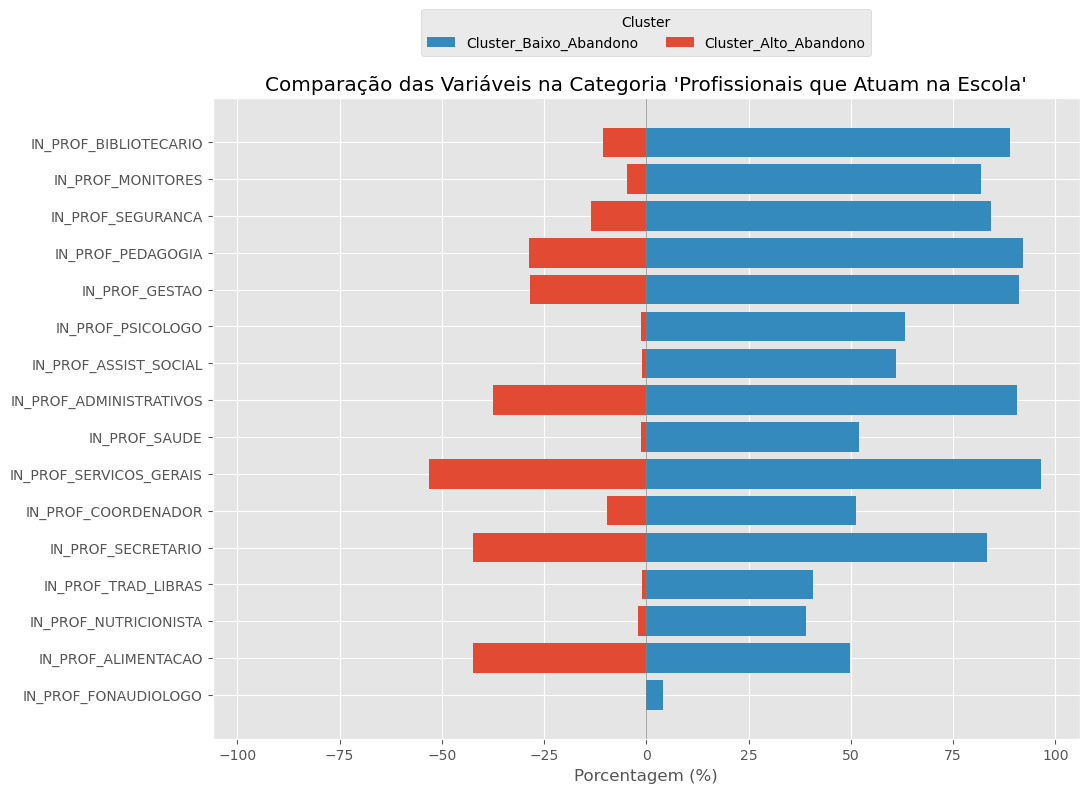

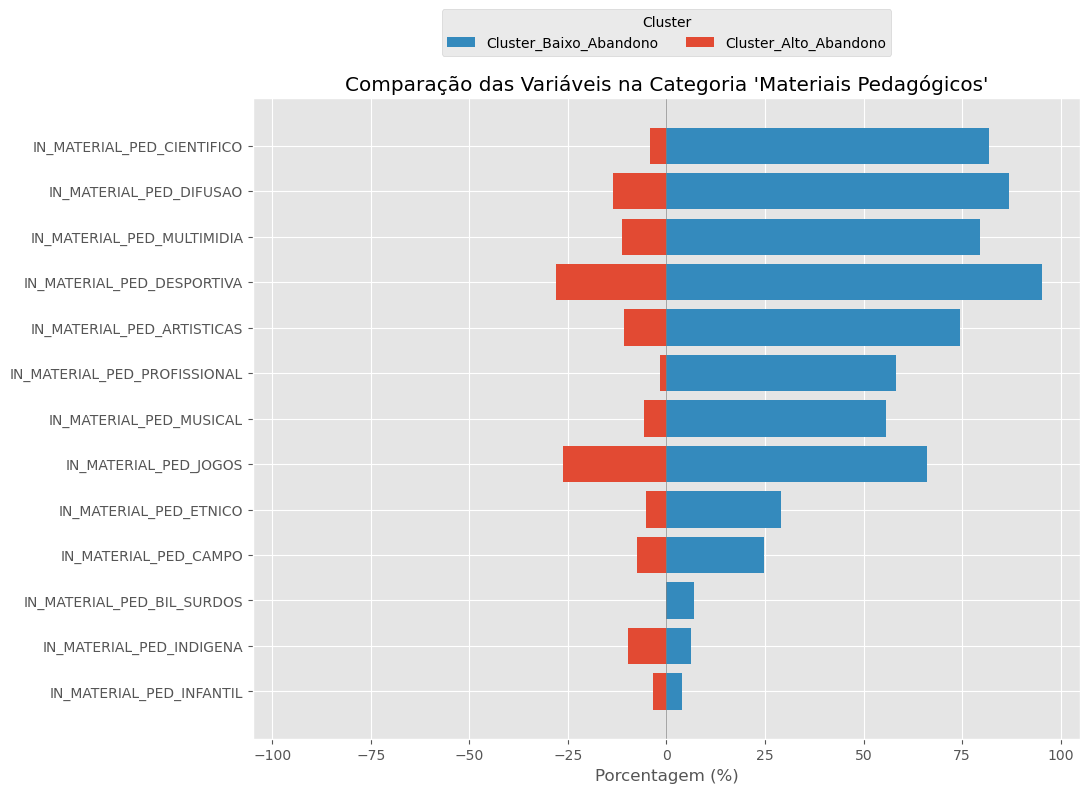

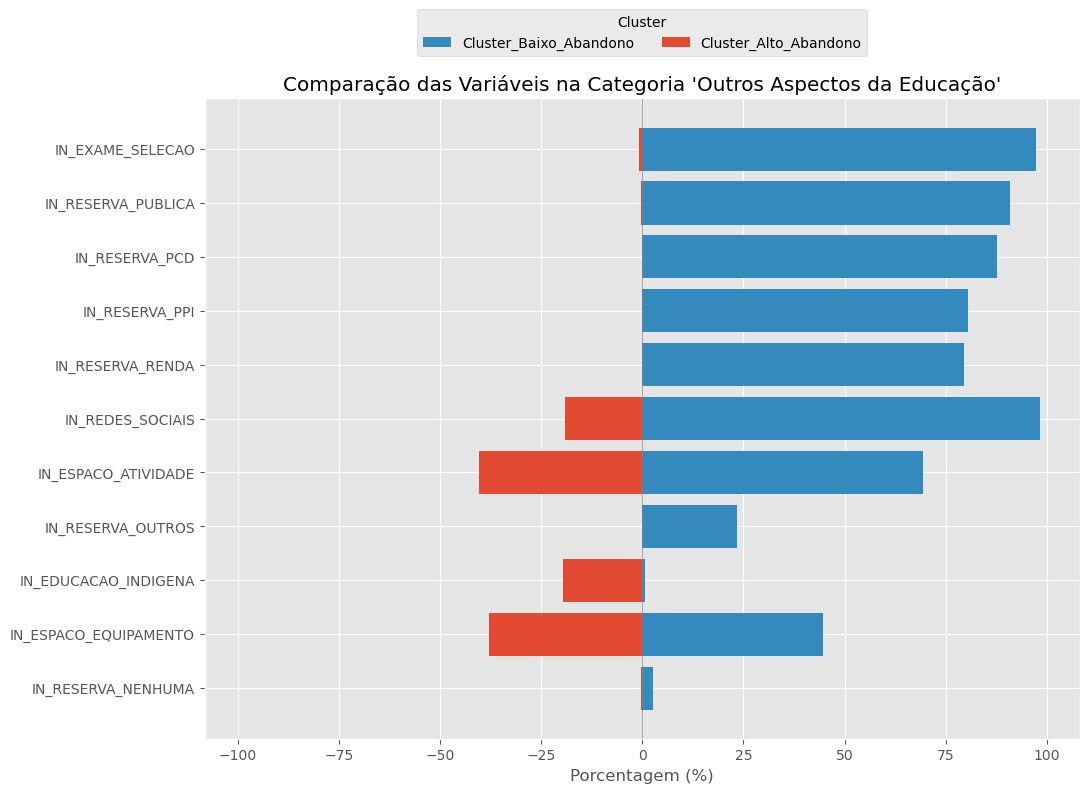

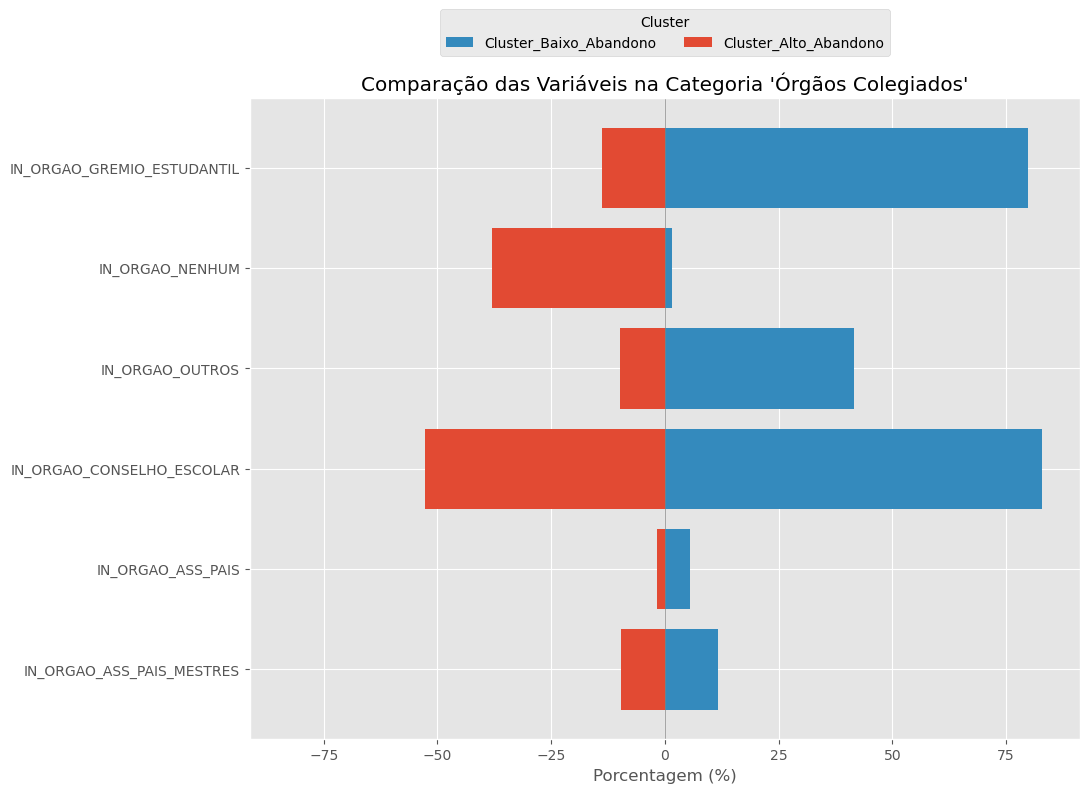

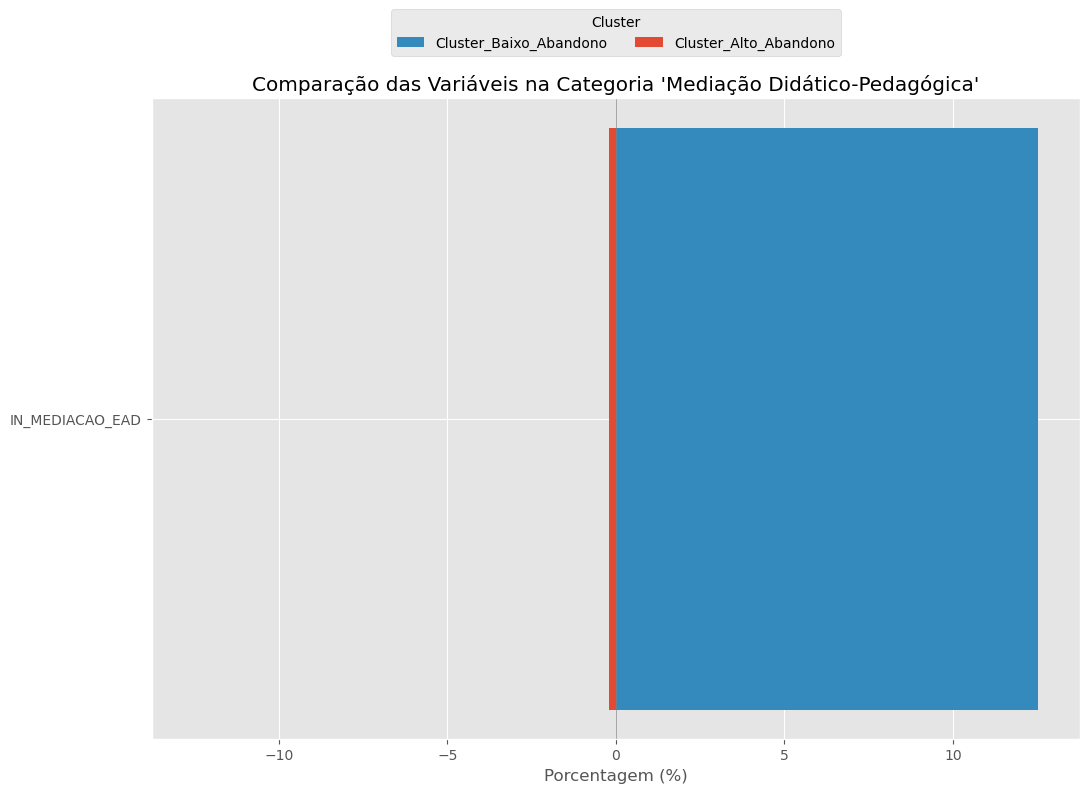

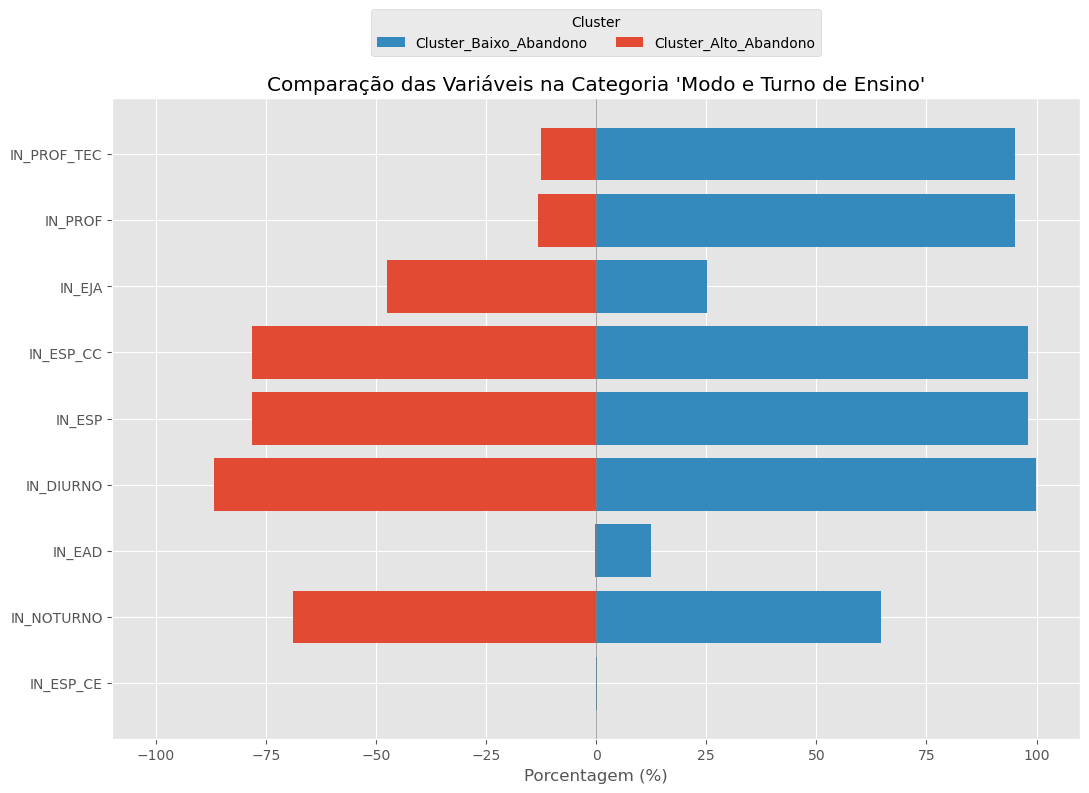

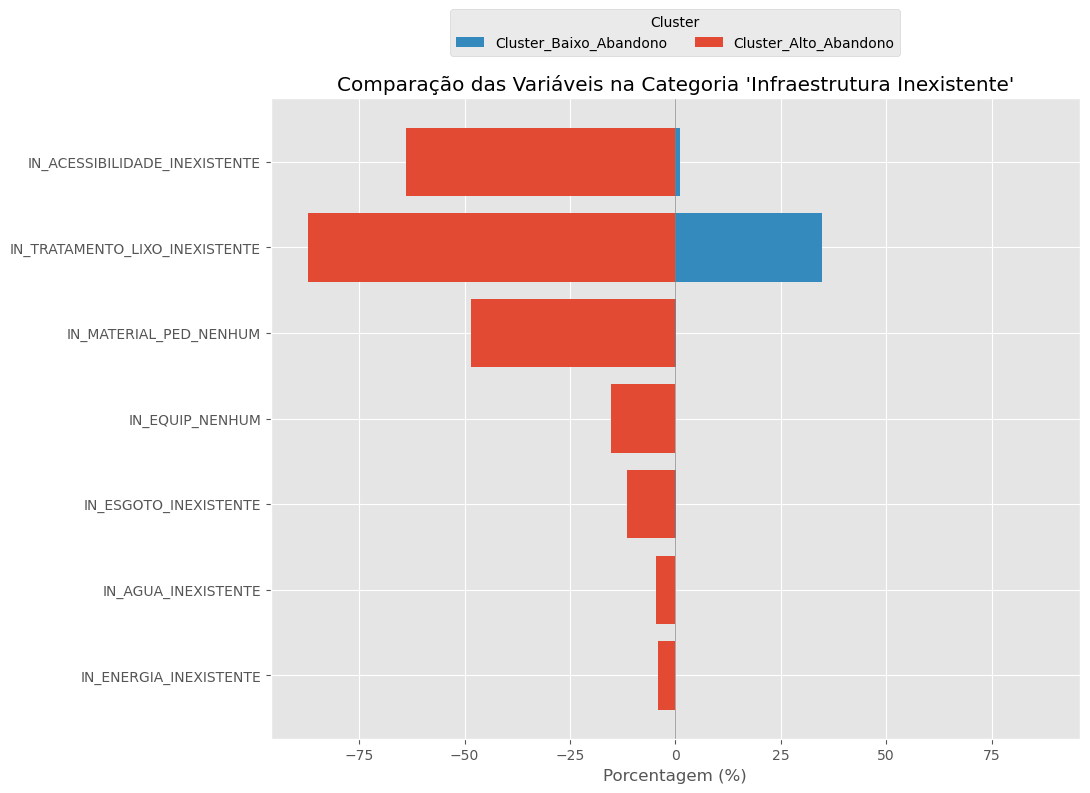

In [120]:
# Executa a função para gerar os gráficos para todas as categorias
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categorias)

#### Gráfico Local de Funcionamento da Escola

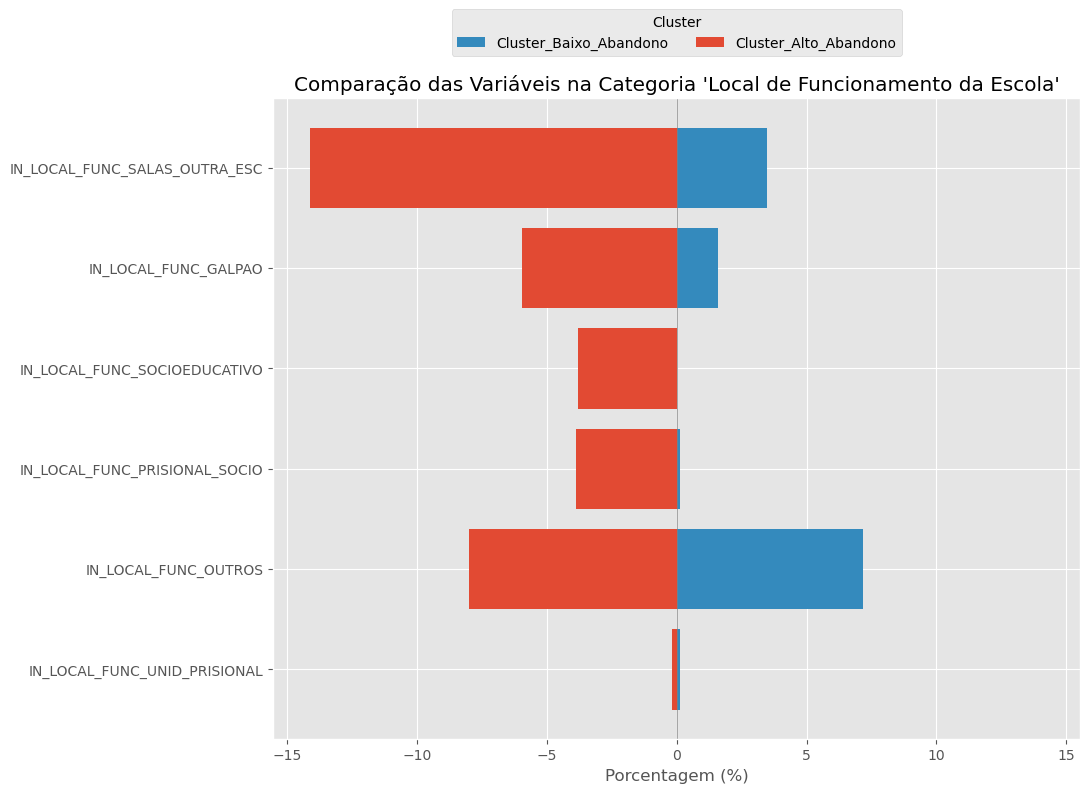

In [126]:
categoria = "Local de Funcionamento da Escola"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

#### Gráfico Dependências Físicas

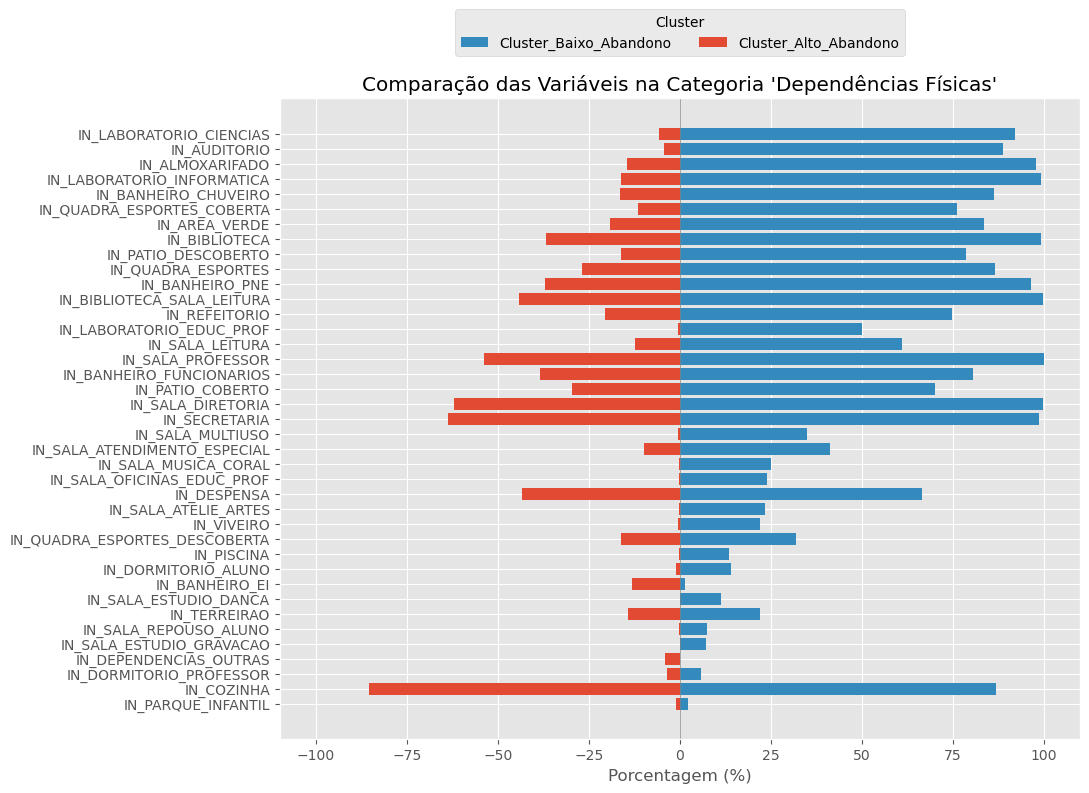

In [124]:
categoria = "Dependências Físicas"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

#### Gráfico Internet e Computadores para Alunos

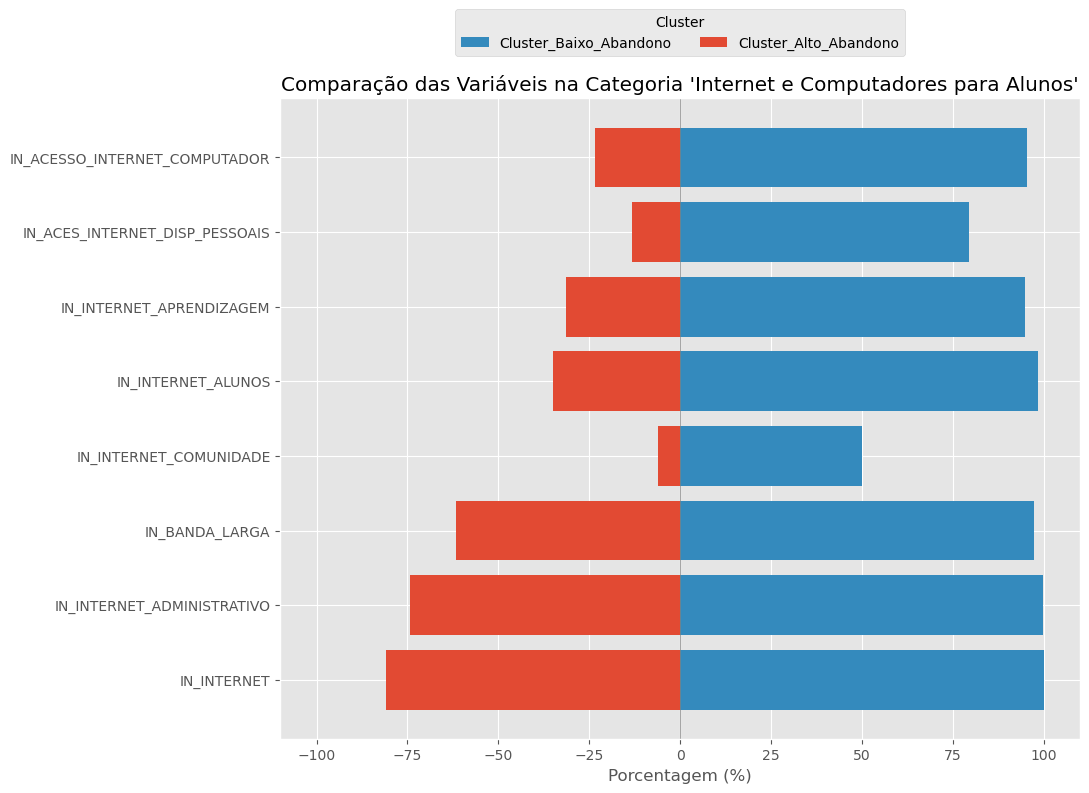

In [128]:
categoria = "Internet e Computadores para Alunos"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

#### Gráfico Profissionais que Atuam na Escola

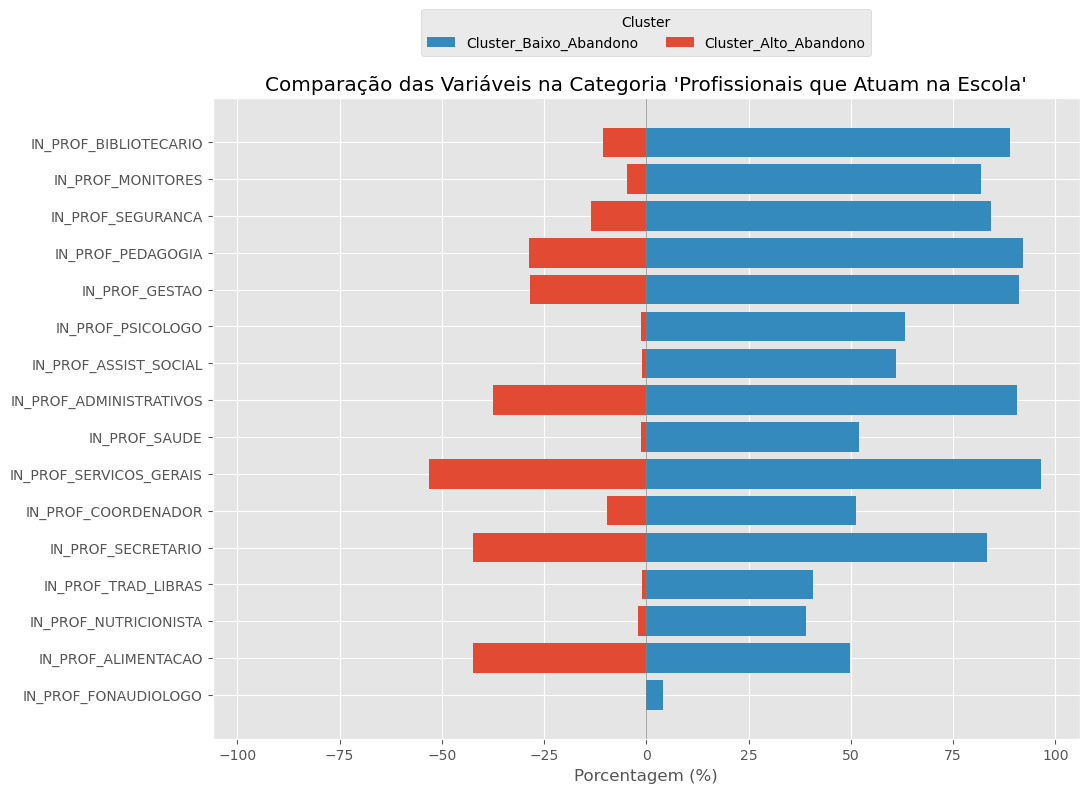

In [130]:
categoria = "Profissionais que Atuam na Escola"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

#### Gráfico Outros Aspectos da Educação

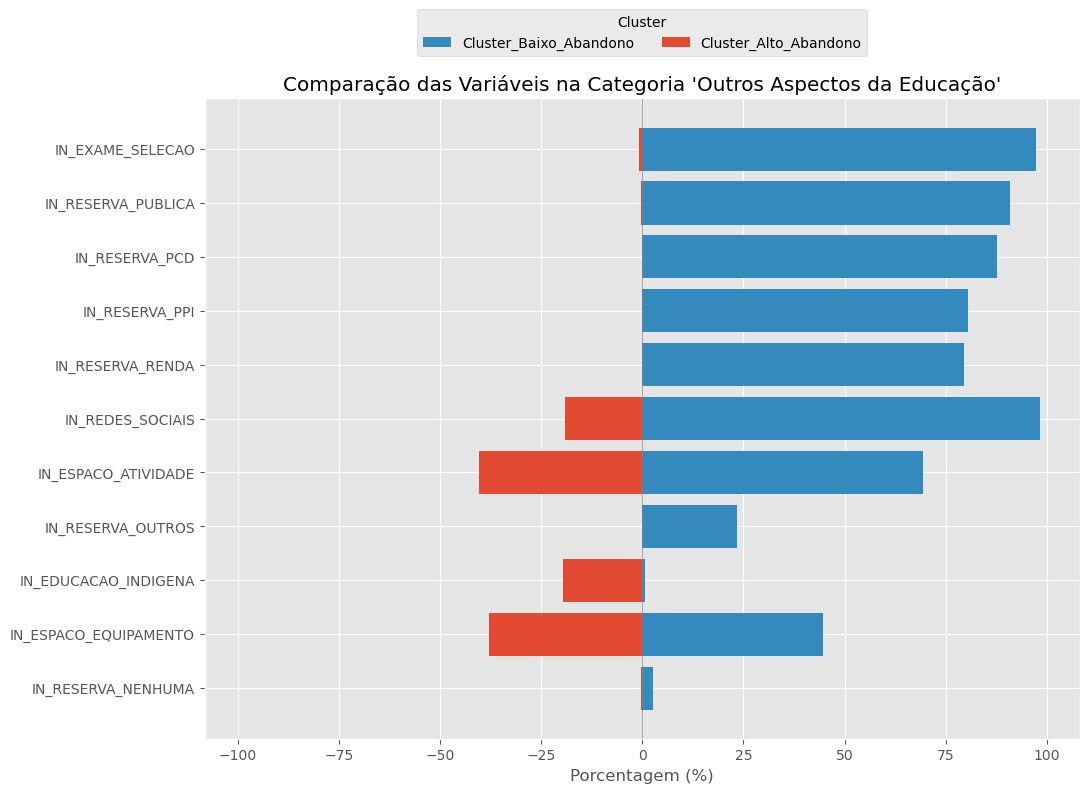

In [132]:
categoria = "Outros Aspectos da Educação"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

#### Gráfico Modo e Turno de Ensino

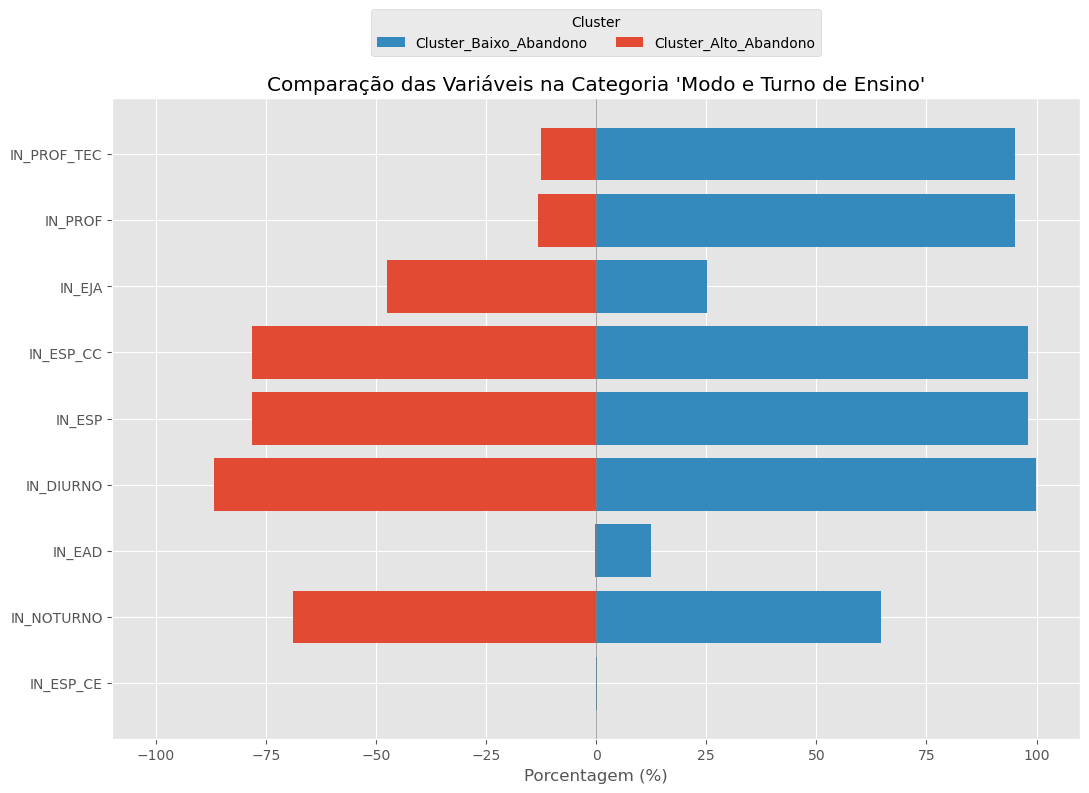

In [134]:
categoria = "Modo e Turno de Ensino"
categoria_filtrada = {categoria: categorias[categoria]}
gerar_graficos_bidirecionais_por_categoria(cluster_analysis_v3, categoria_filtrada)

In [ ]:
# Defina os clusters a serem comparados
cluster_a = "Cluster_Alto_Abandono"
cluster_b = "Cluster_Baixo_Abandono"

# Calcula a diferença de porcentagem entre os clusters para cada variável
differences = []
for variable in cluster_analysis_v3[cluster_a].keys():
    # Porcentagem do Cluster A e Cluster B
    percent_a = cluster_analysis_v3[cluster_a].get(variable, {'Porcentagem': 0})['Porcentagem']
    percent_b = cluster_analysis_v3[cluster_b].get(variable, {'Porcentagem': 0})['Porcentagem']
    
    # Calcula a diferença e adiciona à lista
    differences.append((variable, percent_b - percent_a, percent_a, percent_b))

# Ordena as variáveis pela maior diferença e seleciona as 10 principais
top_diff_variables = sorted(differences, key=lambda x: abs(x[1]), reverse=True)[:10]

# Extrai os nomes das variáveis e as porcentagens reais para o gráfico
variaveis = [item[0] for item in top_diff_variables]
porcentagens_a = [item[2] for item in top_diff_variables]
porcentagens_b = [item[3] for item in top_diff_variables]

# Cria o gráfico bidirecional para as variáveis com maior diferença
fig, ax = plt.subplots(figsize=(10, 8))

# Plota as barras para Cluster A à direita
ax.barh(variaveis, porcentagens_a, color="skyblue", label=cluster_a)

# Plota as barras para Cluster B à esquerda (valores negativos para aparecer do lado oposto)
ax.barh(variaveis, [-p for p in porcentagens_b], color="salmon", label=cluster_b)

# Configurações do gráfico
ax.set_xlabel("Porcentagem (%)")
ax.set_title(f"Comparação das Variáveis com Maior Diferença entre {cluster_a} e {cluster_b}")
ax.legend(loc="upper right")

# Linha central para separar os clusters
ax.axvline(0, color="gray", linewidth=0.5)

# Ajusta os limites para dar espaço às barras
limite_max = max(max(porcentagens_a), max(porcentagens_b)) * 1.1
ax.set_xlim(-limite_max, limite_max)

plt.tight_layout()
plt.show()

### Caracterização do perfil geográfico dos clusters

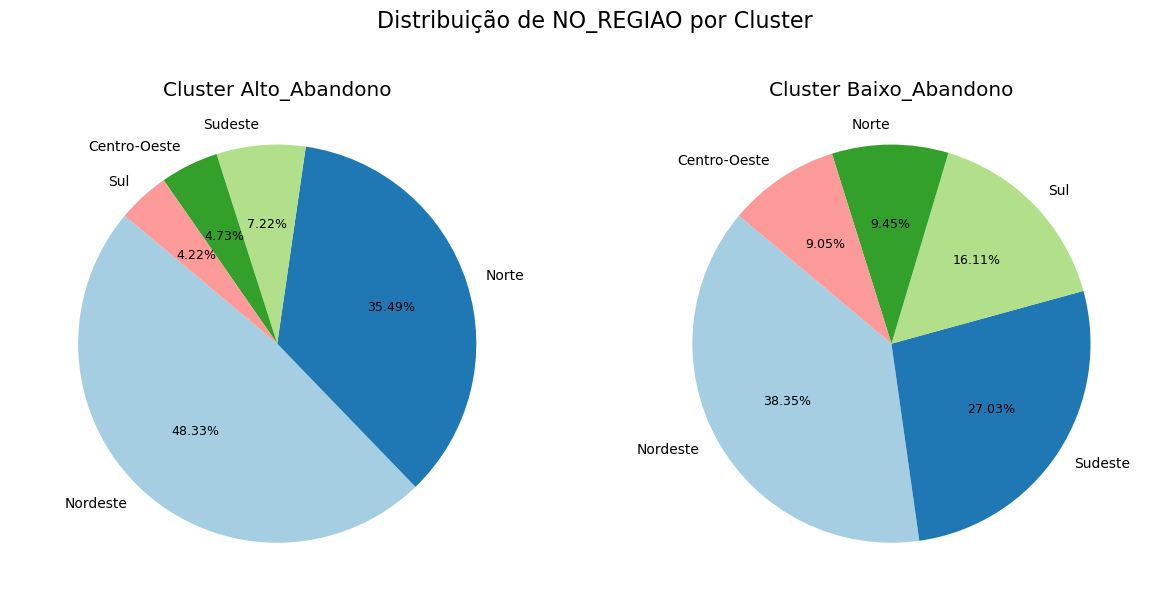

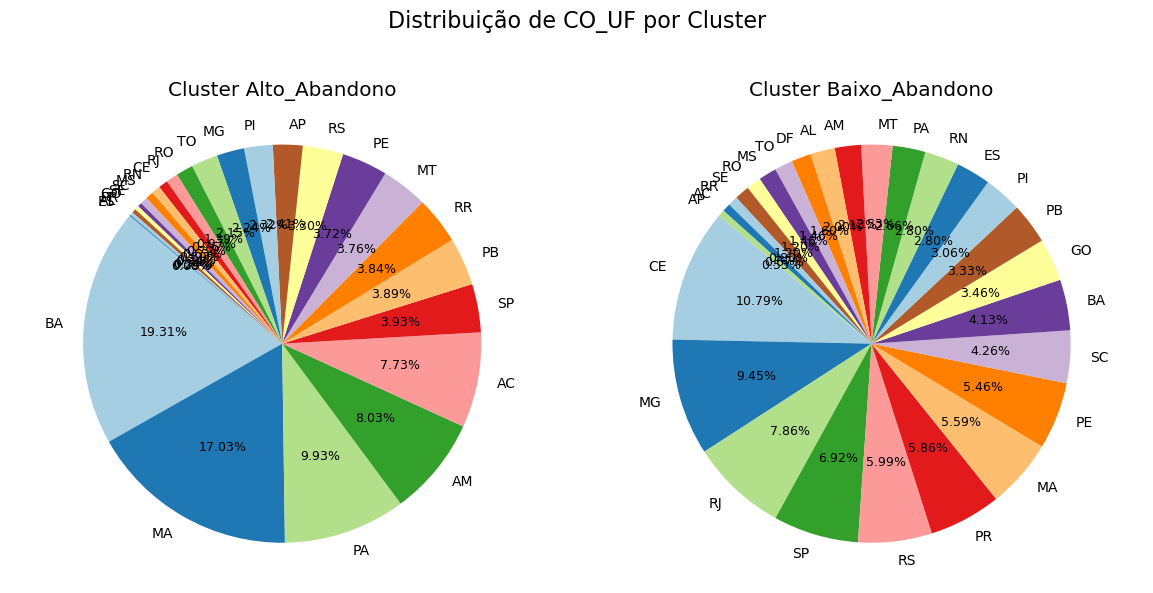

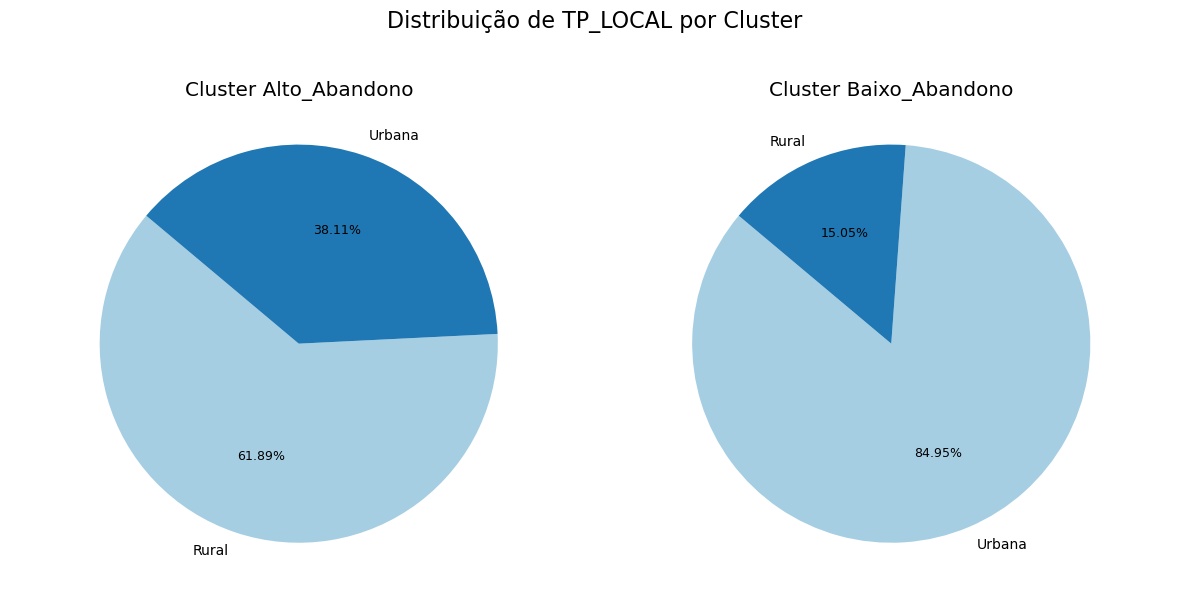

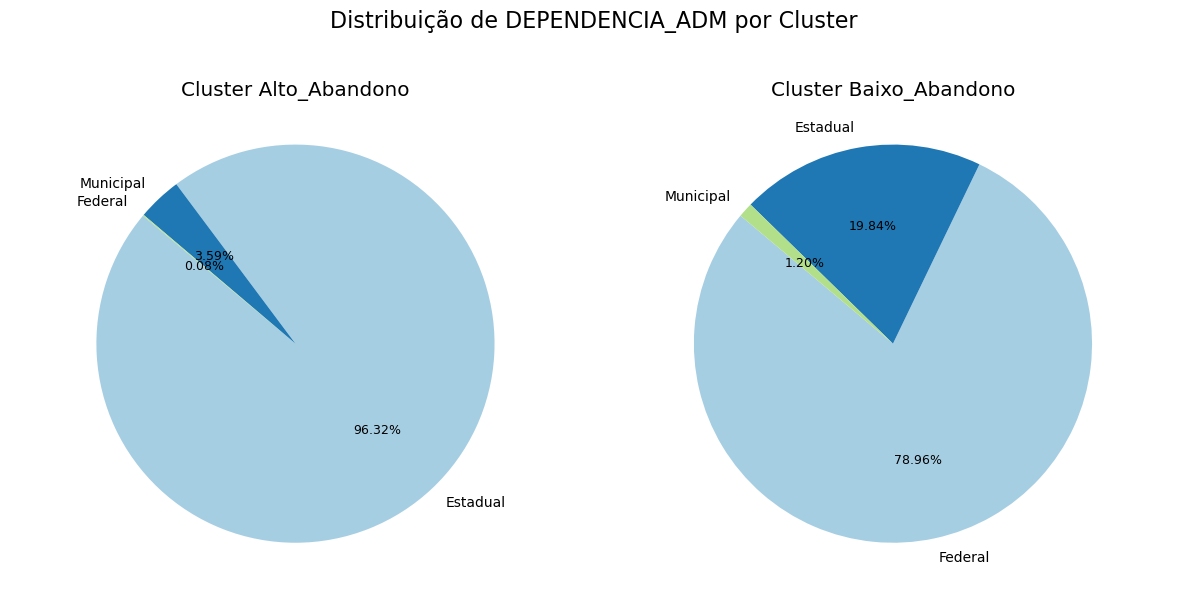

In [63]:
# Define o número de clusters para configurar a grade de subplots
clusters = ['Alto_Abandono', 'Baixo_Abandono']
num_clusters = len(clusters)

# Itera sobre cada coluna para criar gráficos lado a lado por cluster
for coluna, encoder in label_encoders.items():
    fig, axes = plt.subplots(1, num_clusters, figsize=(6 * num_clusters, 6))
    fig.suptitle(f"Distribuição de {coluna} por Cluster", fontsize=16)
    
    for i, cluster in enumerate(clusters):
        # Filtra os dados para o cluster atual
        dados_cluster = gmm_pca[gmm_pca['Cluster'] == cluster]
        
        # Conta a proporção de cada valor na coluna para o cluster atual
        contagem_valores = dados_cluster[coluna].value_counts(normalize=True) * 100
        
        # Mapeia os índices para os nomes usando o inverse_transform dos encoders
        labels = encoder.inverse_transform(contagem_valores.index) 
        sizes = contagem_valores.values
        
        # Gráfico de pizza para o cluster atual
        wedges, texts, autotexts = axes[i].pie(
            sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors
        )
        
        # Ajuste dos textos internos de porcentagem
        for autotext in autotexts:
            autotext.set_fontsize(9)
        
        axes[i].set_title(f"Cluster {cluster}")
        axes[i].axis('equal') 

    plt.style.use('ggplot')
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

In [65]:
label_encoders = {
    'NO_REGIAO': label_encoders['NO_REGIAO'],
    'CO_UF': label_encoders['CO_UF'],
    'TP_LOCAL': label_encoders['TP_LOCAL'],
    'DEPENDENCIA_ADM': label_encoders['DEPENDENCIA_ADM']
}

# Lista de variáveis categóricas que vamos analisar
categorical_vars = ['NO_REGIAO', 'CO_UF', 'TP_LOCAL', 'DEPENDENCIA_ADM']

# Ordem para os clusters
cluster_order = ['Baixo_Abandono', 'Médio_Abandono', 'Alto_Abandono']

#Função para criar a tabela para cada variável categórica
def generate_category_cluster_table(df, column, encoder):
    if df[column].dtype == 'int':
        df_copy = df.copy()
        df_copy[column] = encoder.inverse_transform(df_copy[column])
    else:
        df_copy = df.copy()
    
    # Calcula a contagem por categoria e cluster
    cluster_counts = df_copy.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    cluster_counts = cluster_counts.reindex(columns=cluster_order)
    
    # Adiciona coluna de total por categoria
    cluster_counts['TOTAL_' + column] = cluster_counts.sum(axis=1)
    
    # Adiciona linha de total por cluster
    cluster_counts.loc['TOTAL_CATEGORIA'] = cluster_counts.sum()
    
    print(f"Tabela para {column}")
    display(cluster_counts)

# Gera a tabela para cada variável categórica
for column in categorical_vars:
    generate_category_cluster_table(gmm_pca, column, label_encoders[column])

Tabela para NO_REGIAO


Cluster,Baixo_Abandono,Médio_Abandono,Alto_Abandono,TOTAL_NO_REGIAO
NO_REGIAO,,,,
Centro-Oeste,68,1555,112,1735
Nordeste,288,3754,1144,5186
Norte,71,1223,840,2134
Sudeste,203,7659,171,8033
Sul,121,3353,100,3574
TOTAL_CATEGORIA,751,17544,2367,20662


Tabela para CO_UF


Cluster,Baixo_Abandono,Médio_Abandono,Alto_Abandono,TOTAL_CO_UF
CO_UF,,,,
AC,5,75,183,263
AL,15,231,6,252
AM,16,201,190,407
AP,4,73,57,134
BA,31,517,457,1005
CE,81,587,18,686
DF,12,94,0,106
ES,21,291,2,314
GO,26,721,8,755


Tabela para TP_LOCAL


Cluster,Baixo_Abandono,Médio_Abandono,Alto_Abandono,TOTAL_TP_LOCAL
TP_LOCAL,,,,
Rural,113,1462,1465,3040
Urbana,638,16082,902,17622
TOTAL_CATEGORIA,751,17544,2367,20662


Tabela para DEPENDENCIA_ADM


Cluster,Baixo_Abandono,Médio_Abandono,Alto_Abandono,TOTAL_DEPENDENCIA_ADM
DEPENDENCIA_ADM,,,,
Estadual,149,17407,2280,19836
Federal,593,6,2,601
Municipal,9,131,85,225
TOTAL_CATEGORIA,751,17544,2367,20662


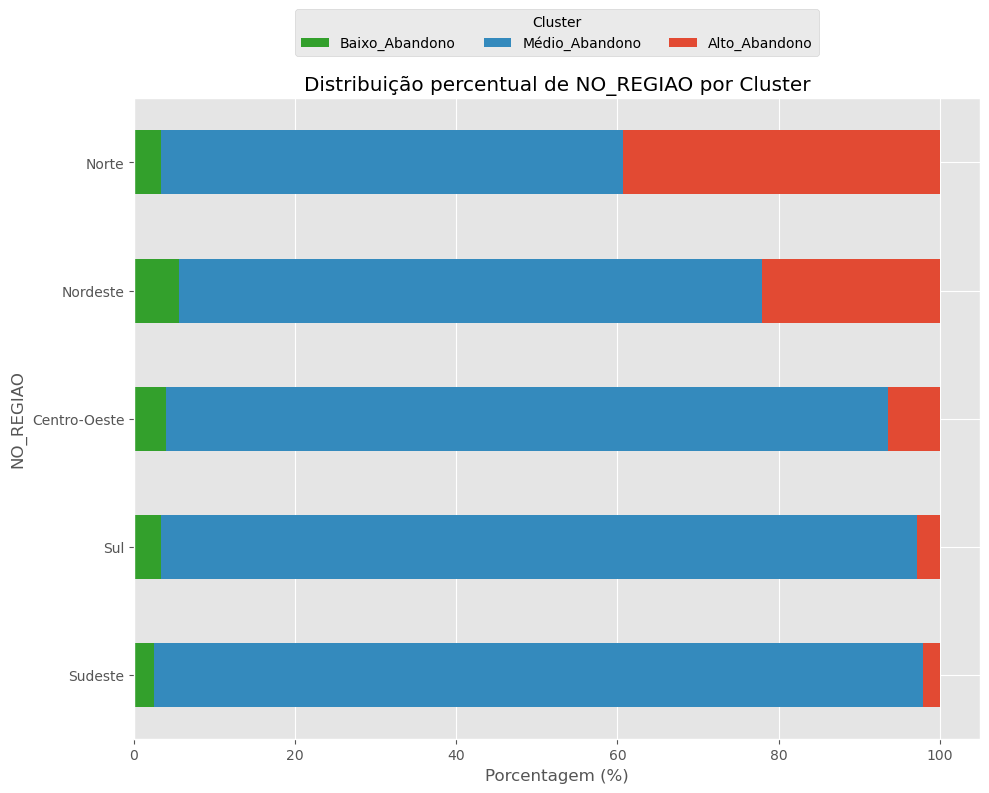

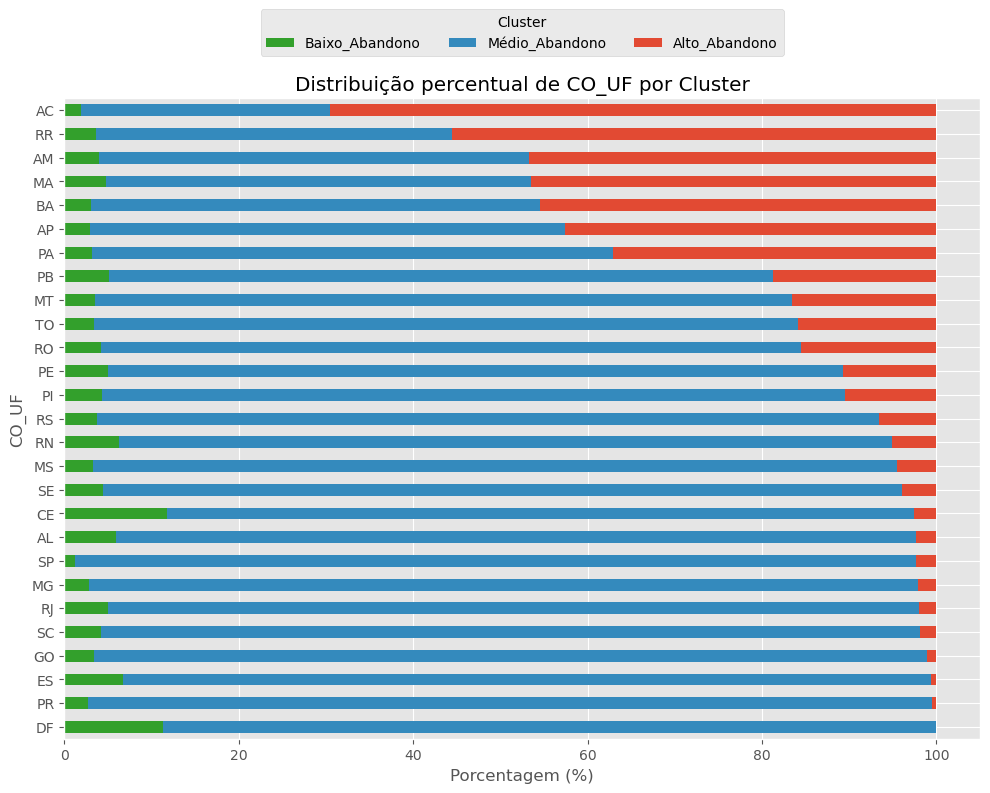

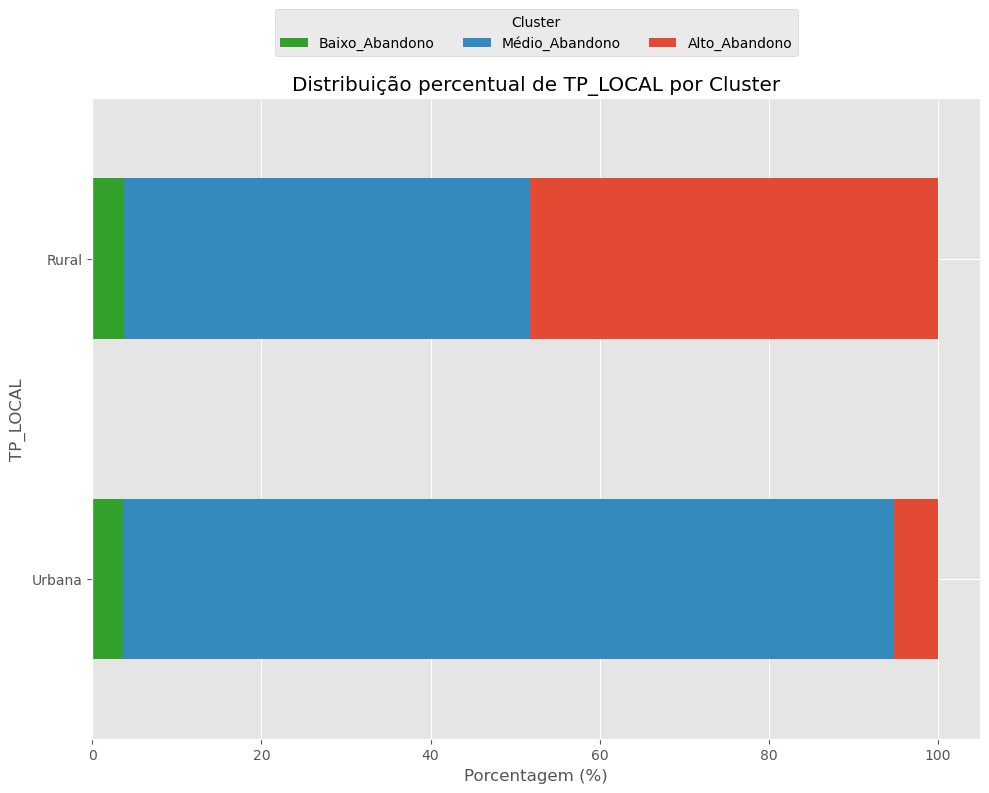

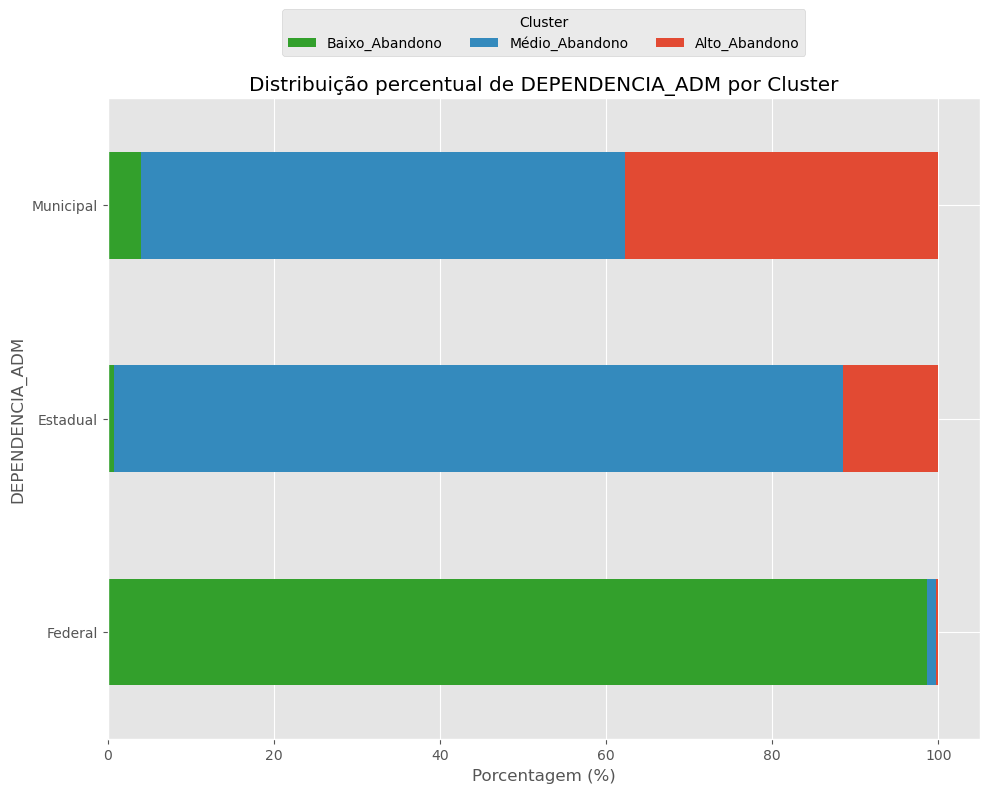

In [136]:
# Função para decodificar os valores categóricos
def decode_categorical(df, column, encoder):
    df[column] = encoder.inverse_transform(df[column])
    return df

# Função para calcular a porcentagem de cada categoria dentro de cada cluster
def calculate_percentage(df, column):
    # Conta o número de ocorrências de cada valor em cada cluster
    cluster_counts = df.groupby([column, 'Cluster']).size().unstack(fill_value=0)
    
    # Calcula a porcentagem para cada categoria em cada cluster
    cluster_percentages = (cluster_counts.div(cluster_counts.sum(axis=1), axis=0) * 100).fillna(0)
    
    # Garante a ordem correta dos clusters e ordena pela coluna 'Alto abandono'
    cluster_percentages = cluster_percentages[['Baixo_Abandono', 'Médio_Abandono', 'Alto_Abandono']]
    cluster_percentages = cluster_percentages.sort_values(by='Alto_Abandono', ascending=True)
    
    return cluster_percentages

# Função para plotar os gráficos
def plot_stacked_bar_horizontal(df, categorical_vars):
    for var_name in categorical_vars:
        df_copy = df.copy()
        df_copy = decode_categorical(df_copy, var_name, label_encoders[var_name])
        
        # Calcula as porcentagens e ordena pela taxa de Alto abandono
        cluster_percentages = calculate_percentage(df_copy, var_name)

        ax = cluster_percentages.plot(kind='barh', stacked=True, figsize=(10, 8), color=['#33a02c', '#348ABD', '#e24a33'])
        ax.set_ylabel(var_name)
        ax.set_xlabel("Porcentagem (%)")
        ax.set_title(f"Distribuição percentual de {var_name} por Cluster")
        
        plt.legend(title="Cluster", labels=["Baixo_Abandono", "Médio_Abandono", "Alto_Abandono"], loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
        
        plt.tight_layout()
        plt.show()

# Lista de variáveis categóricas a serem analisadas
categorical_vars = ['NO_REGIAO', 'CO_UF', 'TP_LOCAL', 'DEPENDENCIA_ADM']

# Plotar os gráficos para cada variável
plot_stacked_bar_horizontal(gmm_pca, categorical_vars)

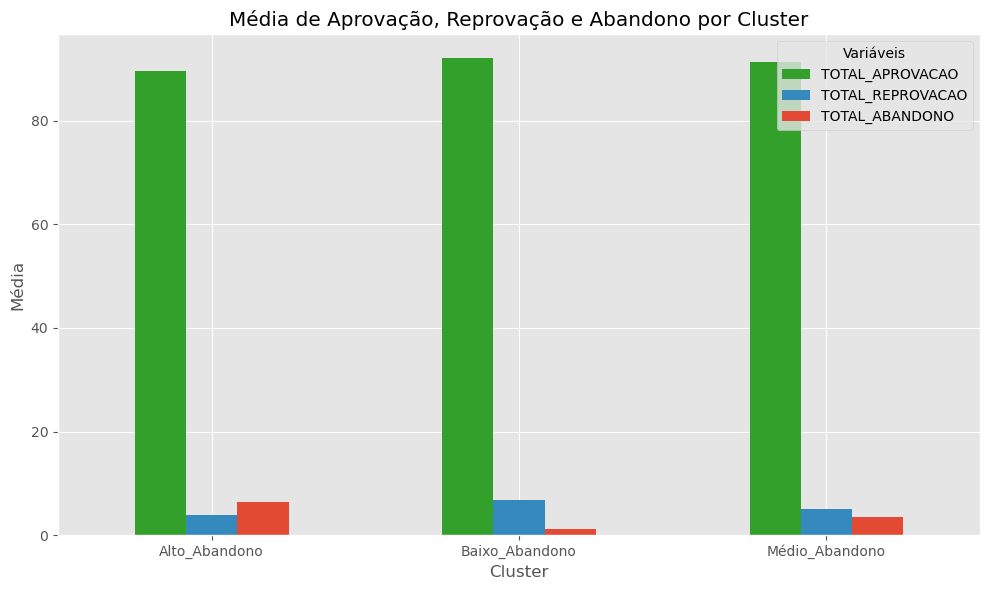

In [138]:
# Calcular a média das variáveis por cluster
cluster_means = gmm_pca.groupby('Cluster')[['TOTAL_APROVACAO', 'TOTAL_REPROVACAO', 'TOTAL_ABANDONO']].mean()

# Plotar o gráfico
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=['#33a02c', '#348ABD', '#e24a33'])
ax.set_xlabel("Cluster")
ax.set_ylabel("Média")
ax.set_title("Média de Aprovação, Reprovação e Abandono por Cluster")
plt.legend(title="Variáveis")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

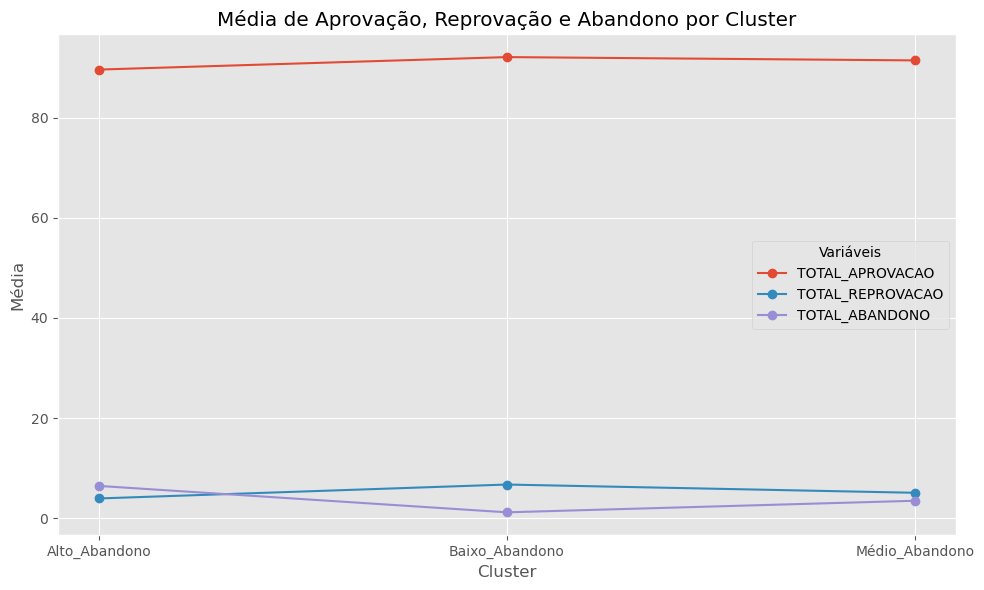

In [88]:
# Calcula a média das variáveis por cluster
mean_values = gmm_pca.groupby('Cluster')[['TOTAL_APROVACAO', 'TOTAL_REPROVACAO', 'TOTAL_ABANDONO']].mean()

# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
for column in mean_values.columns:
    plt.plot(mean_values.index, mean_values[column], marker='o', label=column)

plt.xlabel('Cluster')
plt.ylabel('Média')
plt.title('Média de Aprovação, Reprovação e Abandono por Cluster')
plt.legend(title='Variáveis')
plt.tight_layout()
plt.show()

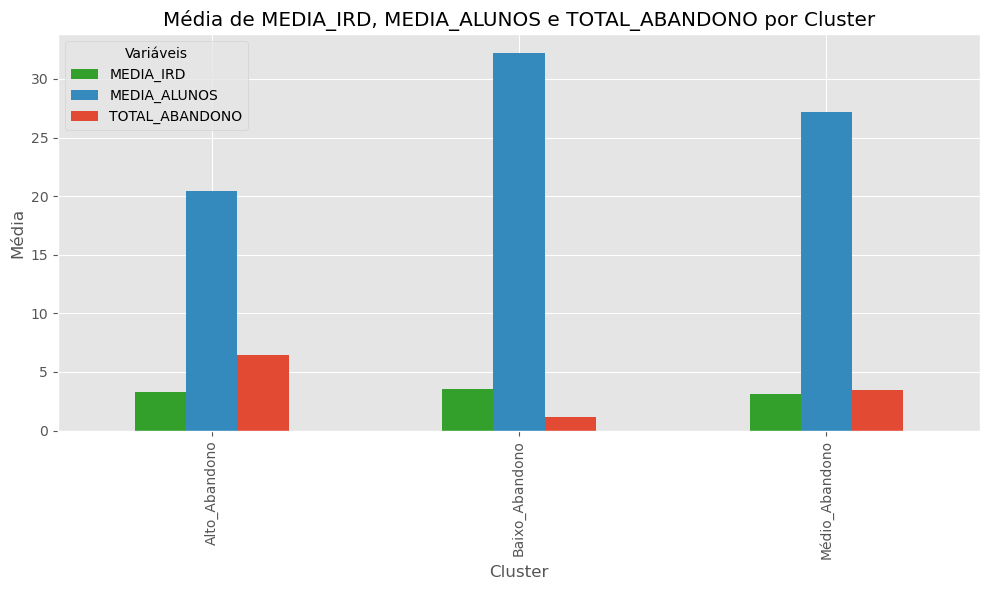

In [140]:
# Calcula a média das variáveis por cluster
mean_values = gmm_pca.groupby('Cluster')[['MEDIA_IRD', 'MEDIA_ALUNOS', 'TOTAL_ABANDONO']].mean()

# Cria o gráfico de barras
mean_values.plot(kind='bar', figsize=(10, 6), color=['#33a02c', '#348ABD', '#e24a33'])
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.title('Média de MEDIA_IRD, MEDIA_ALUNOS e TOTAL_ABANDONO por Cluster')
plt.legend(title='Variáveis')
plt.tight_layout()
plt.show()

In [ ]:
# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
for column in mean_values.columns:
    plt.plot(mean_values.index, mean_values[column], marker='o', label=column)

plt.xlabel('Cluster')
plt.ylabel('Média')
plt.title('Média de MEDIA_IRD, MEDIA_ALUNOS e TOTAL_ABANDONO por Cluster')
plt.legend(title='Variáveis')
plt.tight_layout()
plt.show()